# Cristina Venturini 2022461

## Assignment 5

In [1]:
library(tibble)
library(ggplot2)
library(latex2exp)
theme_set(theme_bw())

Warning message:
"package 'tibble' was built under R version 3.6.3"Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'latex2exp' was built under R version 3.6.3"

## Exercise 1

The number of particles emitted by a radioactive source during a fixed interval of time ($\Delta t = 10s$) follows a Poisson distribution on the parameter $\mu$. The number of particles observed during consecutive time intervals is: $4$, $1$, $3$, $1$ and $3$.

### 1.1

1. Suppose first a uniform prior distribution and successively a Jeffrey’s prior for the parameter $\mu$. For both:
- determine and draw the posterior distribution for $\mu$, given the data;
- evaluate mean, median and variance, both analytically and numerically in _R_.

Starting from Bayes theorem:
$P(\mu | \{x_k\} M)\propto f(\{x_k\} | \mu M) \cdot g(\mu|M)$
with $\{x_k\}$ our measurements. 

The likelihood for a single measurement of a Poisson process is 
$$f(x|\mu)=\frac{\mu^x e^{-\mu}}{x!} \text{ with } \mu>0 \text{ and } x = 0,1,...$$ 
in case of multiple indipendent measurements this expression becomes 
$$f(\{x_k\}|\mu) = \prod^n_{k=1} f(x_k|\mu)\propto \mu^{\sum x_k} \cdot e^{-n\mu}$$ 
which has the form of a Gamma distribution:
$$Gamma(x|\alpha,\lambda)=kx^{\alpha-1} e^{-\lambda x}$$.

In the case of a prior uniform distribution we can see it as a Gamma function, $Gamma(1,0)$, in the case of a Jeffrey's prior as a $Gamma\left(\frac{1}{2},0\right)$.
For a positive uniform prior the posterior is $Gamma(\alpha,\lambda)$ with $$\alpha=\sum_k x_k +1 \text{ and } \lambda = n$$; for a Jeffrey's prior the posterior is a $Gamma(\alpha,\lambda)$ with $$\alpha=\sum_k x_k +\frac{1}{2} \text{ and } \lambda = n$$.

#### Uniform Prior

In [2]:
# uniform prior

delta.p = 0.001
p = seq(0,6,delta.p)
alpha_u = 1+4+1+3+1+3
alpha_j = 0.5+4+1+3+1+3
lambda = 0+5
unif_pt_norm = dgamma(p,alpha_u,lambda)/(delta.p*sum(dgamma(p,alpha_u,lambda)))
jeff_pt_norm = dgamma(p,alpha_j,lambda)/(delta.p*sum(dgamma(p,alpha_j,lambda)))

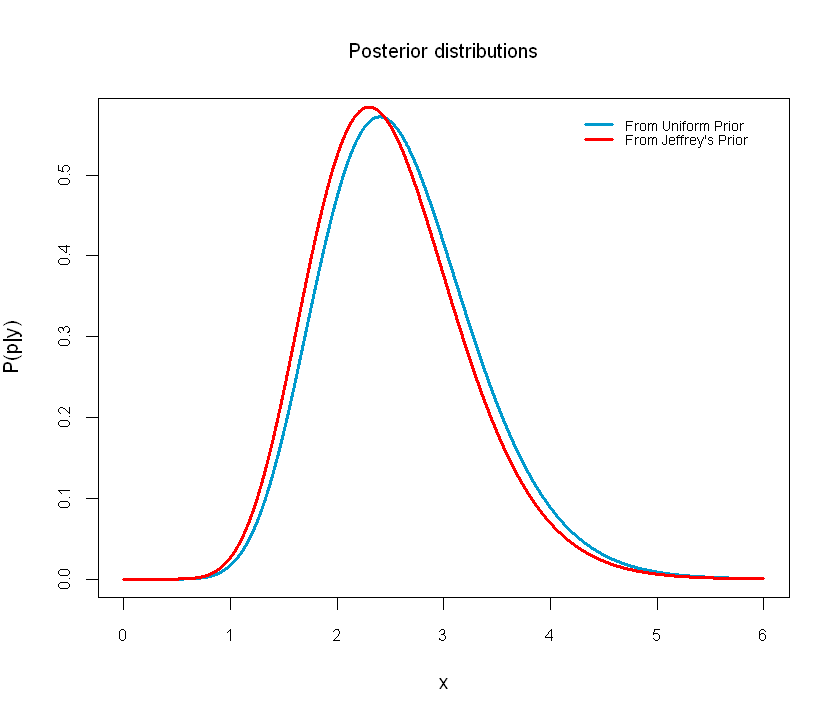

In [3]:
options(repr.plot.width=7, repr.plot.height=6)
plot(p, unif_pt_norm, main = TeX("Posterior distributions"),
     col="deepskyblue3", xaxp  = c(0, 6, 6), yaxp = c(0,0.6,6),
     xlab = TeX('$x$'), ylab = TeX('$P(p|y)$'), cex.lab=1, cex.axis=0.8, cex.main=1, type='l', lwd=3)
lines(p, jeff_pt_norm, col="red", type='l', lwd=3)
legend(4.2, 0.58, legend=c("From Uniform Prior","From Jeffrey's Prior"),
        col=c("deepskyblue3","red"), lty = c(1,1), lwd = c(3,3), cex=0.7, box.lty=0)


For the Gamma distribution the median has no simple closed form so the analytical expression is not evaluated.

In [4]:
# mean and variance from theory

mean_unif = alpha_u/lambda
var_unif = alpha_u/lambda^2
mean_jeff = alpha_j/lambda
var_jeff = alpha_j/lambda^2

# there's no closed form for the median of the Gamma distribution, by definition the median is the value of x for which 
# P(x<=median) = P(x>median) = 0.5
# what we can do is calculate the value of x for which the integral of the PDF is 0.5. In order to do so we use the function
# uniroot which allows to solve the equation, finding x. First, we also need to write our pdf as a function

unif_pt_func = function(p){
    dgamma(p,alpha_u,lambda)
}
jeff_pt_func = function(p){
    dgamma(p,alpha_j,lambda)
}

In [5]:
# mean and variance numerically

e_x_unif = delta.p*sum(p*unif_pt_norm)
var_x_unif = delta.p*sum(p^2*unif_pt_norm) - e_x_unif^2
e_x_jeff = delta.p*sum(p*jeff_pt_norm)
var_x_jeff = delta.p*sum(p^2*jeff_pt_norm) - e_x_jeff^2

# for the median we can use the cumulative sum, when the cumulative sum of dgamma is 0.5 we choose the corresponding
# value of p as our median

med_unif = uniroot(function(x) integrate(unif_pt_func, lower=0, upper=x)$value-0.5, c(0,8))$root
med_jeff = uniroot(function(x) integrate(jeff_pt_func, lower=0, upper=x)$value-0.5, c(0,8))$root

In [6]:
cat('**Uniform Prior**')
cat('\n\nNumerically:')
cat('\n\tMean:',round(e_x_unif,4))
cat('\n\tVariance:',round(var_x_unif,4))
cat('\n\tMedian:',round(med_unif,4))
cat('\nFrom theory:')
cat('\n\tMean:',round(mean_unif,4))
cat('\n\tVariance:',round(var_unif,4))
cat('\n\n**Jeffrey\'s Prior**')
cat('\n\nNumerically:')
cat('\n\tMean:',round(e_x_jeff,4))
cat('\n\tVariance:',round(var_x_jeff,4))
cat('\n\tMedian:',round(med_jeff,4))
cat('\nFrom theory:')
cat('\n\tMean:',round(mean_jeff,4))
cat('\n\tVariance:',round(var_jeff,4))

**Uniform Prior**

Numerically:
	Mean: 2.5994
	Variance: 0.5178
	Median: 2.5336
From theory:
	Mean: 2.6
	Variance: 0.52

**Jeffrey's Prior**

Numerically:
	Mean: 2.4996
	Variance: 0.4985
	Median: 2.4337
From theory:
	Mean: 2.5
	Variance: 0.5

### 1.2

2. Evaluate a $95\%$ credibility interval for the results obtained with both priors. Compare the result with that obtained using a normal approximation for the posterior distribution, with the same mean and standard deviation.

In [7]:
# function to find the max of the posterior distribution

find_max = function(p, pd){
    return(p[which(pd>=max(pd)[1])])
}

#function to find the value to subtract(sum) from(to) the previously found max in order to obtain the credibility interval

find_k = function(ci, max, func){
    return(uniroot(function(k) integrate(func, lower=max-k, upper=max+k)$value - ci, c(0,8))$root)
}                   
                   
estimate = function(post){
    post_dtr = post(p)
    p0 = find_max(p, post_dtr)
    low_lim = p0-find_k(0.95, p0, post)
    up_lim = p0+find_k(0.95, p0, post)
    return(c(p0,low_lim,up_lim))
}

In [8]:
u = estimate(unif_pt_func)
j = estimate(jeff_pt_func)

In [9]:
sd_unif = sqrt(var_unif)
sd_jeff = sqrt(var_jeff)
low_lim_u = mean_unif-2*sd_unif
up_lim_u = mean_unif+2*sd_unif
low_lim_j = mean_jeff-2*sd_jeff
up_lim_j = mean_jeff+2*sd_jeff

unif_g = dnorm(p,mean_unif,sd_unif)/(delta.p*sum(dnorm(p,mean_unif,sd_unif)))
jeff_g = dnorm(p,mean_jeff,sd_jeff)/(delta.p*sum(dnorm(p,mean_jeff,sd_jeff)))

In [10]:
cat('Uniform Prior')
cat('\n95% Credibility interval:',round(u[2],4),'-',round(u[3],4))
cat('\nNormal app. for Uniform Prior')
cat('\n95% Credibility interval:',round(low_lim_u,4),'-',round(up_lim_u,4))
cat('\nJeffrey\'s Prior')
cat('\n95% Credibility interval:',round(j[2],4),'-',round(j[3],4))
cat('\nNormal app. for Jeffrey\'s Prior')
cat('\n95% Credibility interval:',round(low_lim_j,4),'-',round(up_lim_j,4))

Uniform Prior
95% Credibility interval: 0.9038 - 3.8962
Normal app. for Uniform Prior
95% Credibility interval: 1.1578 - 4.0422
Jeffrey's Prior
95% Credibility interval: 0.8285 - 3.7715
Normal app. for Jeffrey's Prior
95% Credibility interval: 1.0858 - 3.9142

In [11]:
up = c(unif_pt_norm,unif_g)
jp = c(jeff_pt_norm,jeff_g)
p_plot = rep(p, times=2)
factor = rep(c('Uniform prior','Jeffrey\'s prior'), each = length(p))
ci1 = tibble('xint'=c(low_lim_u, up_lim_u, low_lim_j, up_lim_j), 'fac'=rep(c('Uniform prior','Jeffrey\'s prior'), each =2))
ci2 = tibble('xint'=c(u[2], u[3], j[2], j[3]), 'fac'=rep(c('Uniform prior','Jeffrey\'s prior'), each =2))
plots_1 = tibble('p'=p_plot, 'u'=up, 'j'=jp, 'fac'=factor)

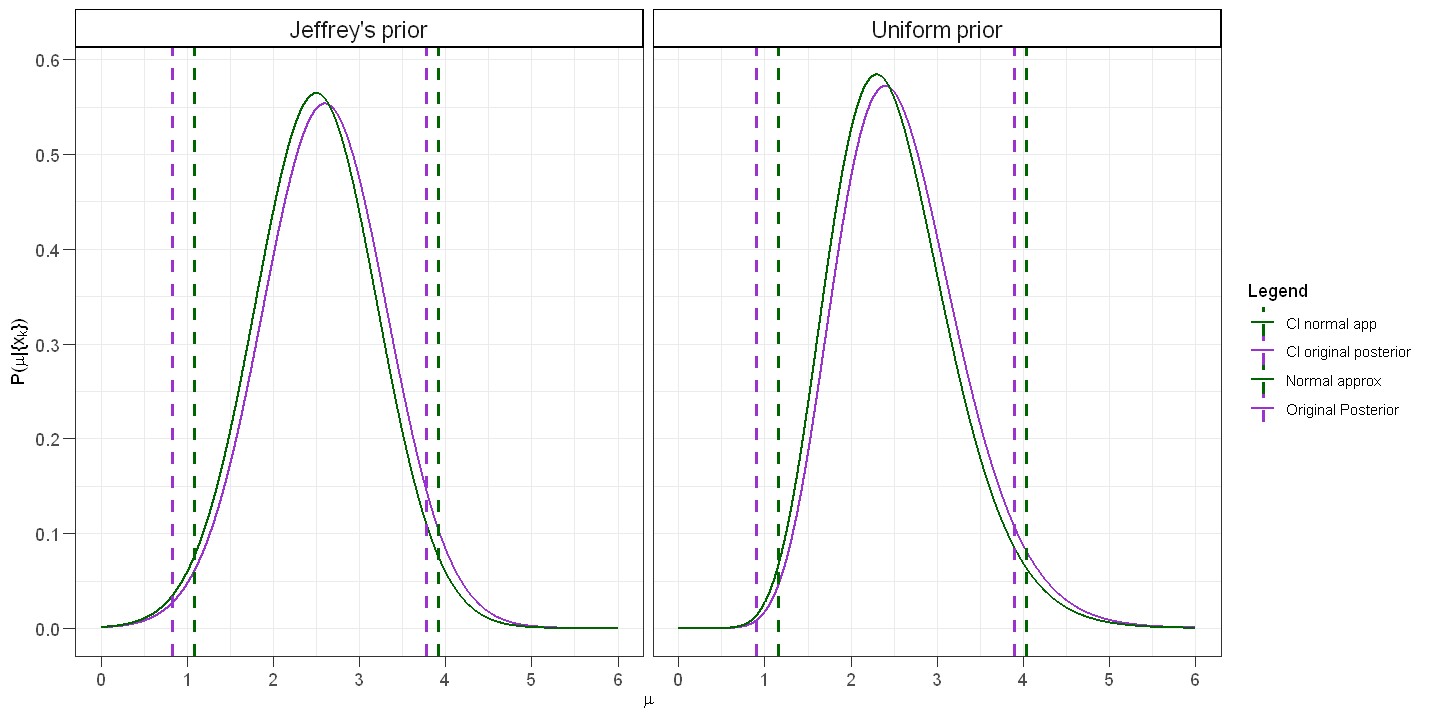

In [12]:
options(repr.plot.width=12, repr.plot.height=6)

plot = ggplot(plots_1) + geom_line(aes(p, u, color = 'Original Posterior'), size = 0.8) + 
geom_line(aes(p, j, color = 'Normal approx'), size = 0.8) +
scale_y_continuous(breaks = scales::pretty_breaks(n = 8))+
scale_x_continuous(breaks = scales::pretty_breaks(n = 8))+
labs(x=TeX('$\\mu$'), color = 'Legend', y =TeX('$P(\\mu | \\{x_k\\})$')) +
geom_vline(data = ci1, aes(xintercept = xint, color = 'CI normal app'), lty = 2, lwd =0.9)+
geom_vline(data = ci2, aes(xintercept = xint, color = 'CI original posterior'), lty = 2, lwd =0.9)+
scale_color_manual(values = c('Original Posterior' = 'darkorchid3', 'Normal approx' = 'darkgreen', 
                              'CI normal app' = 'darkgreen', 'CI original posterior' = 'darkorchid3'))+
theme(plot.title = element_text(color="black", size=12, face="bold.italic"), 
      axis.title.x = element_text(color="black", size=11),
      axis.title.y = element_text(color="black", size=11), 
      axis.ticks.length=unit(.25, "cm"),
      axis.text.x = element_text(size=11),
      axis.text.y = element_text(size=11))
plot + facet_wrap(. ~ fac, ncol=2)+ theme(strip.text.x = element_text(size=14),
                        strip.background = element_rect(colour="black", fill="white", size=0.8, linetype="solid"))

In the graphs above the $95\%$ credibility interval is indicated with the dashed lines. The posterior and the normal approximation with the same mean and standard deviation are extremely similar so it can be said that the normal approximation is a good approximation. The credibility interval is smaller for the normal approximation than for the original posterior.

## Exercise 2

Given the problem of the lightouse discussed last week, study the case in which both the position along the shore $\alpha$ and the distance out at sea $\beta$ are unknown.

We assume that $\alpha$ and $\beta$ are independent, since there's no reason to think otherwise. 

The prior can then be expressed as the product of the priors of the two parameters:
$$
P(\alpha,\beta|M)=P(\alpha|M)\cdot P(\beta|M)
$$ 
For both $\alpha$ and $\beta$ we assume a uniform prior
$$P(i)\begin{cases} 
      \frac{1}{i_{max} - i_{min}} & x\in [i_{min},i_{max}] \\
      0 & \mathrm{otherwise}
   \end{cases}
$$
for $i=\alpha,\beta$.

For the posterior (Bayes Theorem): 
$$P(\alpha,\beta | \{x_k\},M)\propto P(\{x_k\}|\alpha,\beta,M)\cdot P(\alpha|M)\cdot P(\beta|M)$$

The true values of $\alpha$ and $\beta$ are fixed to $$\alpha^*=4, \beta^*=6$$<br>
The data $x_k$ are calculated as $$x_k=\beta^* \tan\theta_k + \alpha^*$$ 
generating $\theta_k$ uniformly in the interval $[-\frac{\pi}{2},\frac{\pi}{2}]$.

In [13]:
# possible values of alpha and beta
x.min = -6
x.max = 6
y.min = 0
y.max = 12

In [14]:
# generating alpha and beta
n.sample = 200
alpha = seq(x.min, x.max, length.out=n.sample+1)
beta = seq(y.min, y.max, length.out=n.sample+1)
h_a = (x.max - x.min)/n.sample
h_b = (y.max - y.min)/n.sample

In [15]:
alpha_true = 4
beta_true = 6

In [16]:
# function for the logarithm of the prior 
log_prior = function(alpha, beta){
    logPR = log(dunif(alpha, min=x.min, max=x.max)) + log(dunif(beta, min=y.min, max=y.max))
    return(logPR)
}

In [17]:
# function for the logarithm of the likelihood
log_lh = function(data, alpha, beta) {
    logL = rep(0, length(alpha))
    for (x in data) {
        logL <- logL + log((beta/pi)/(beta^2+(x-alpha)^2))
    }
    return(logL)
}

In [18]:
# function for the logarithm of the posterior
log_post = function(alpha, beta, data){
    logPT = log_lh(data, alpha, beta) + log_prior(alpha, beta)
    return(logPT)
}

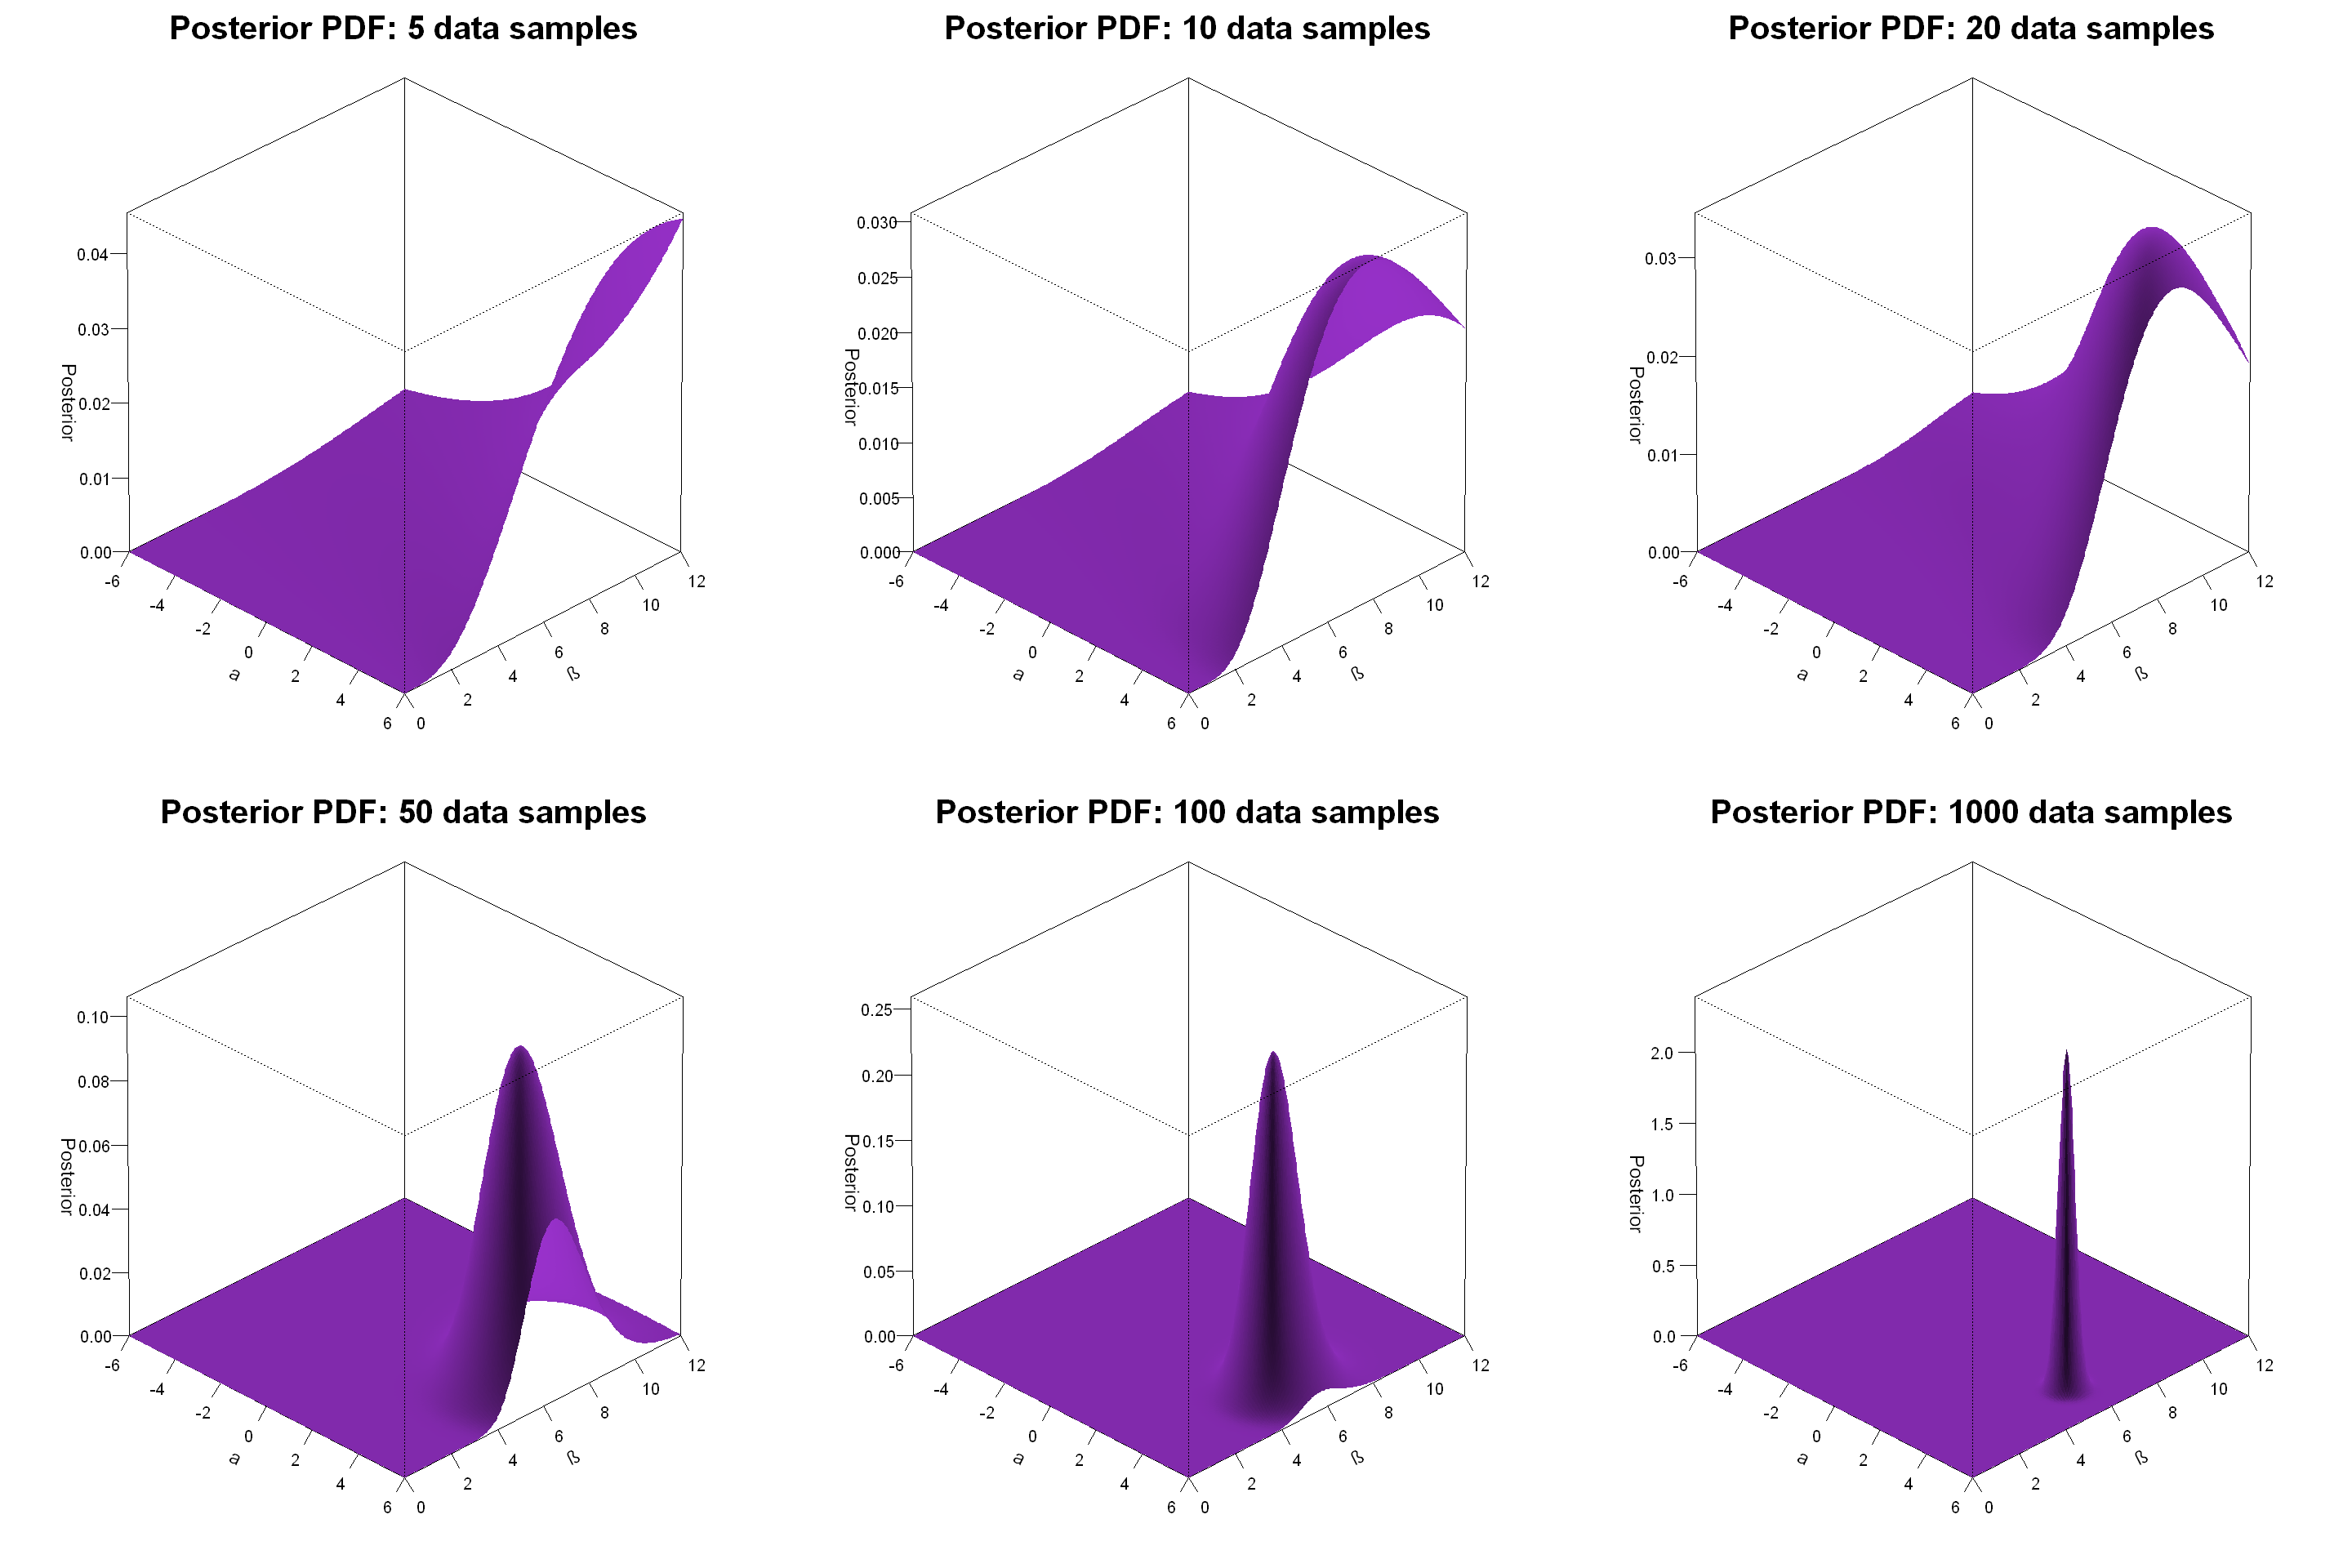

In [19]:
data = c(5,10,20,50,100,1000)
options(repr.plot.width=24, repr.plot.height=16)
par(mfrow=c(2, 3))

for (n in data){
    set.seed(2022461)
    # generate data
    theta_k = runif(n, min = -pi/2, max = +pi/2)
    samples = beta_true*tan(theta_k)+alpha_true
    # calculate posterior varying alpha and beta 
    post = outer(alpha, beta, purrr::partial(log_post, data=samples))
    post = post - max(post)
    post_norm = exp(post)/(h_a*h_b*sum(exp(post)))
    pna = apply(post_norm, 1, sum)
    pnb = apply(post_norm, 2, sum)
    post_norm_a = pna/(h_a*sum(pna))
    post_norm_b = pnb/(h_b*sum(pnb))
    # plotting the posterior in 3D
    persp(alpha, beta , post_norm,
          xlab='α',
          ylab='β',
          zlab='Posterior', 
          main=sprintf("Posterior PDF: %d data samples",n),
          lwd=0.1, ticktype="detailed", col="darkorchid3",
          cex.lab=1.8, cex.axis=1.5, cex.main=3,
          xlim=c(x.min,x.max),
          ylim=c(y.min,y.max),
          theta=45, phi=30, d=50.0, shade=0.25, border = NA)
}

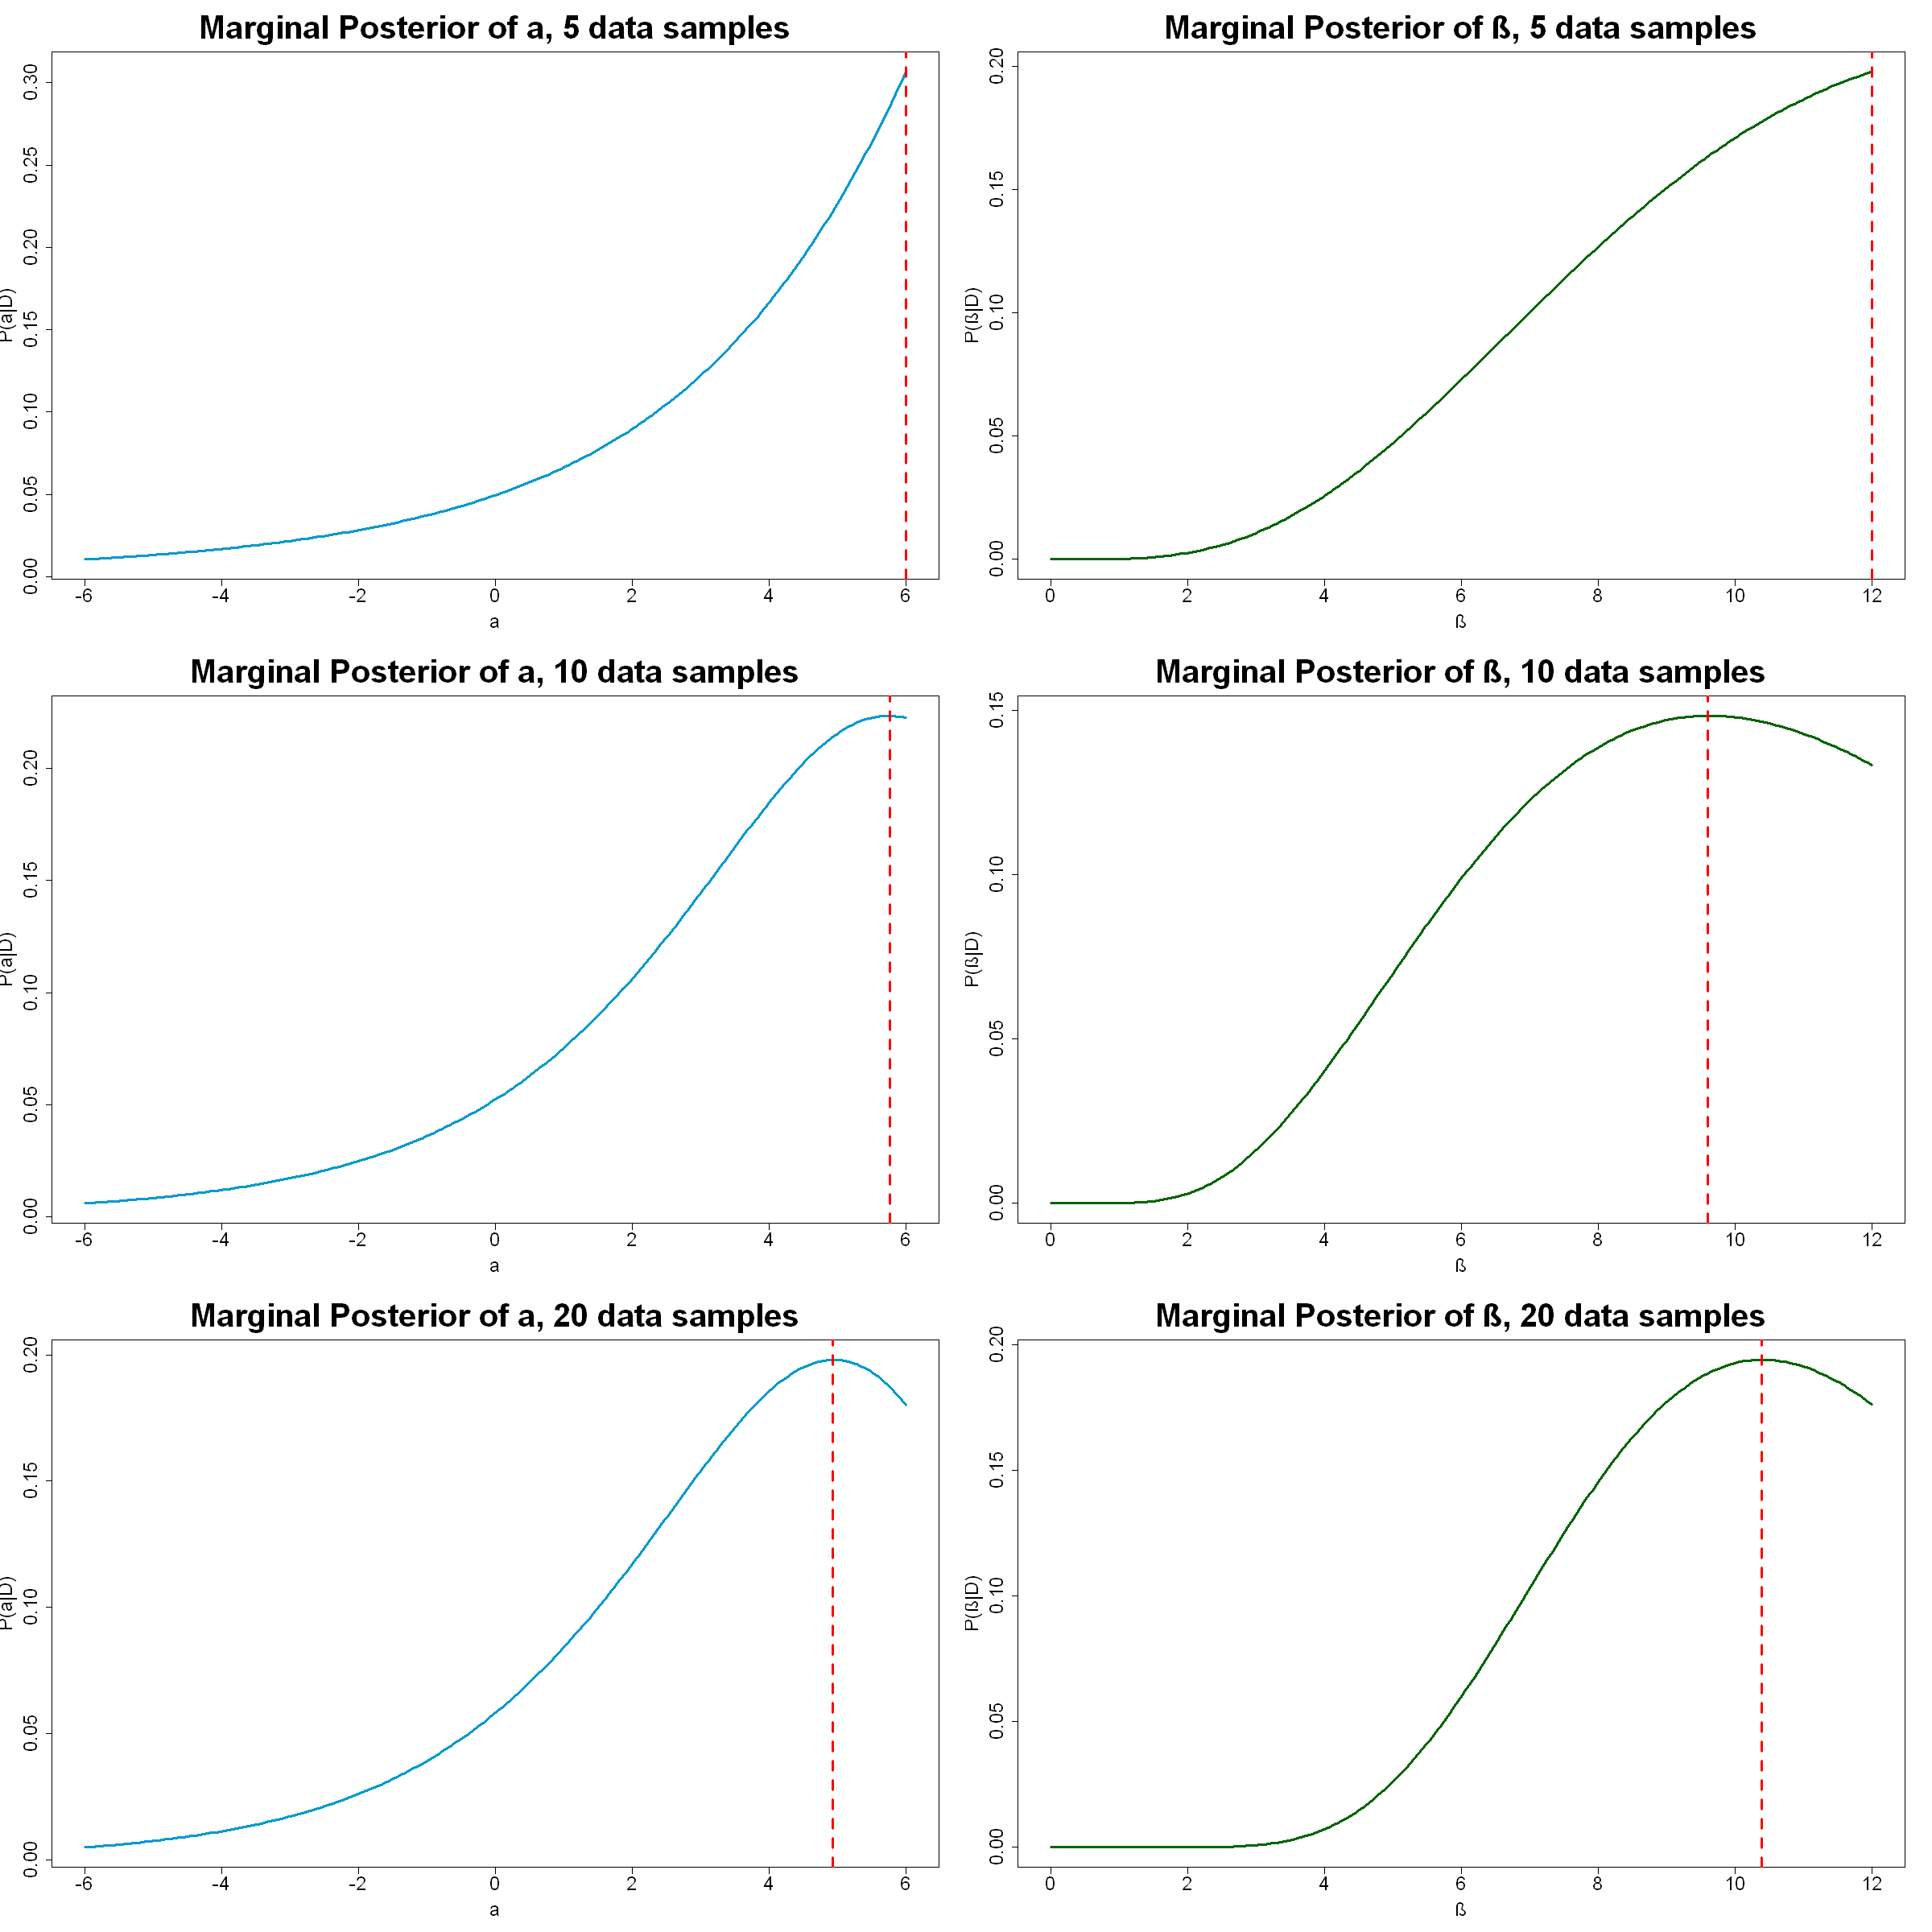

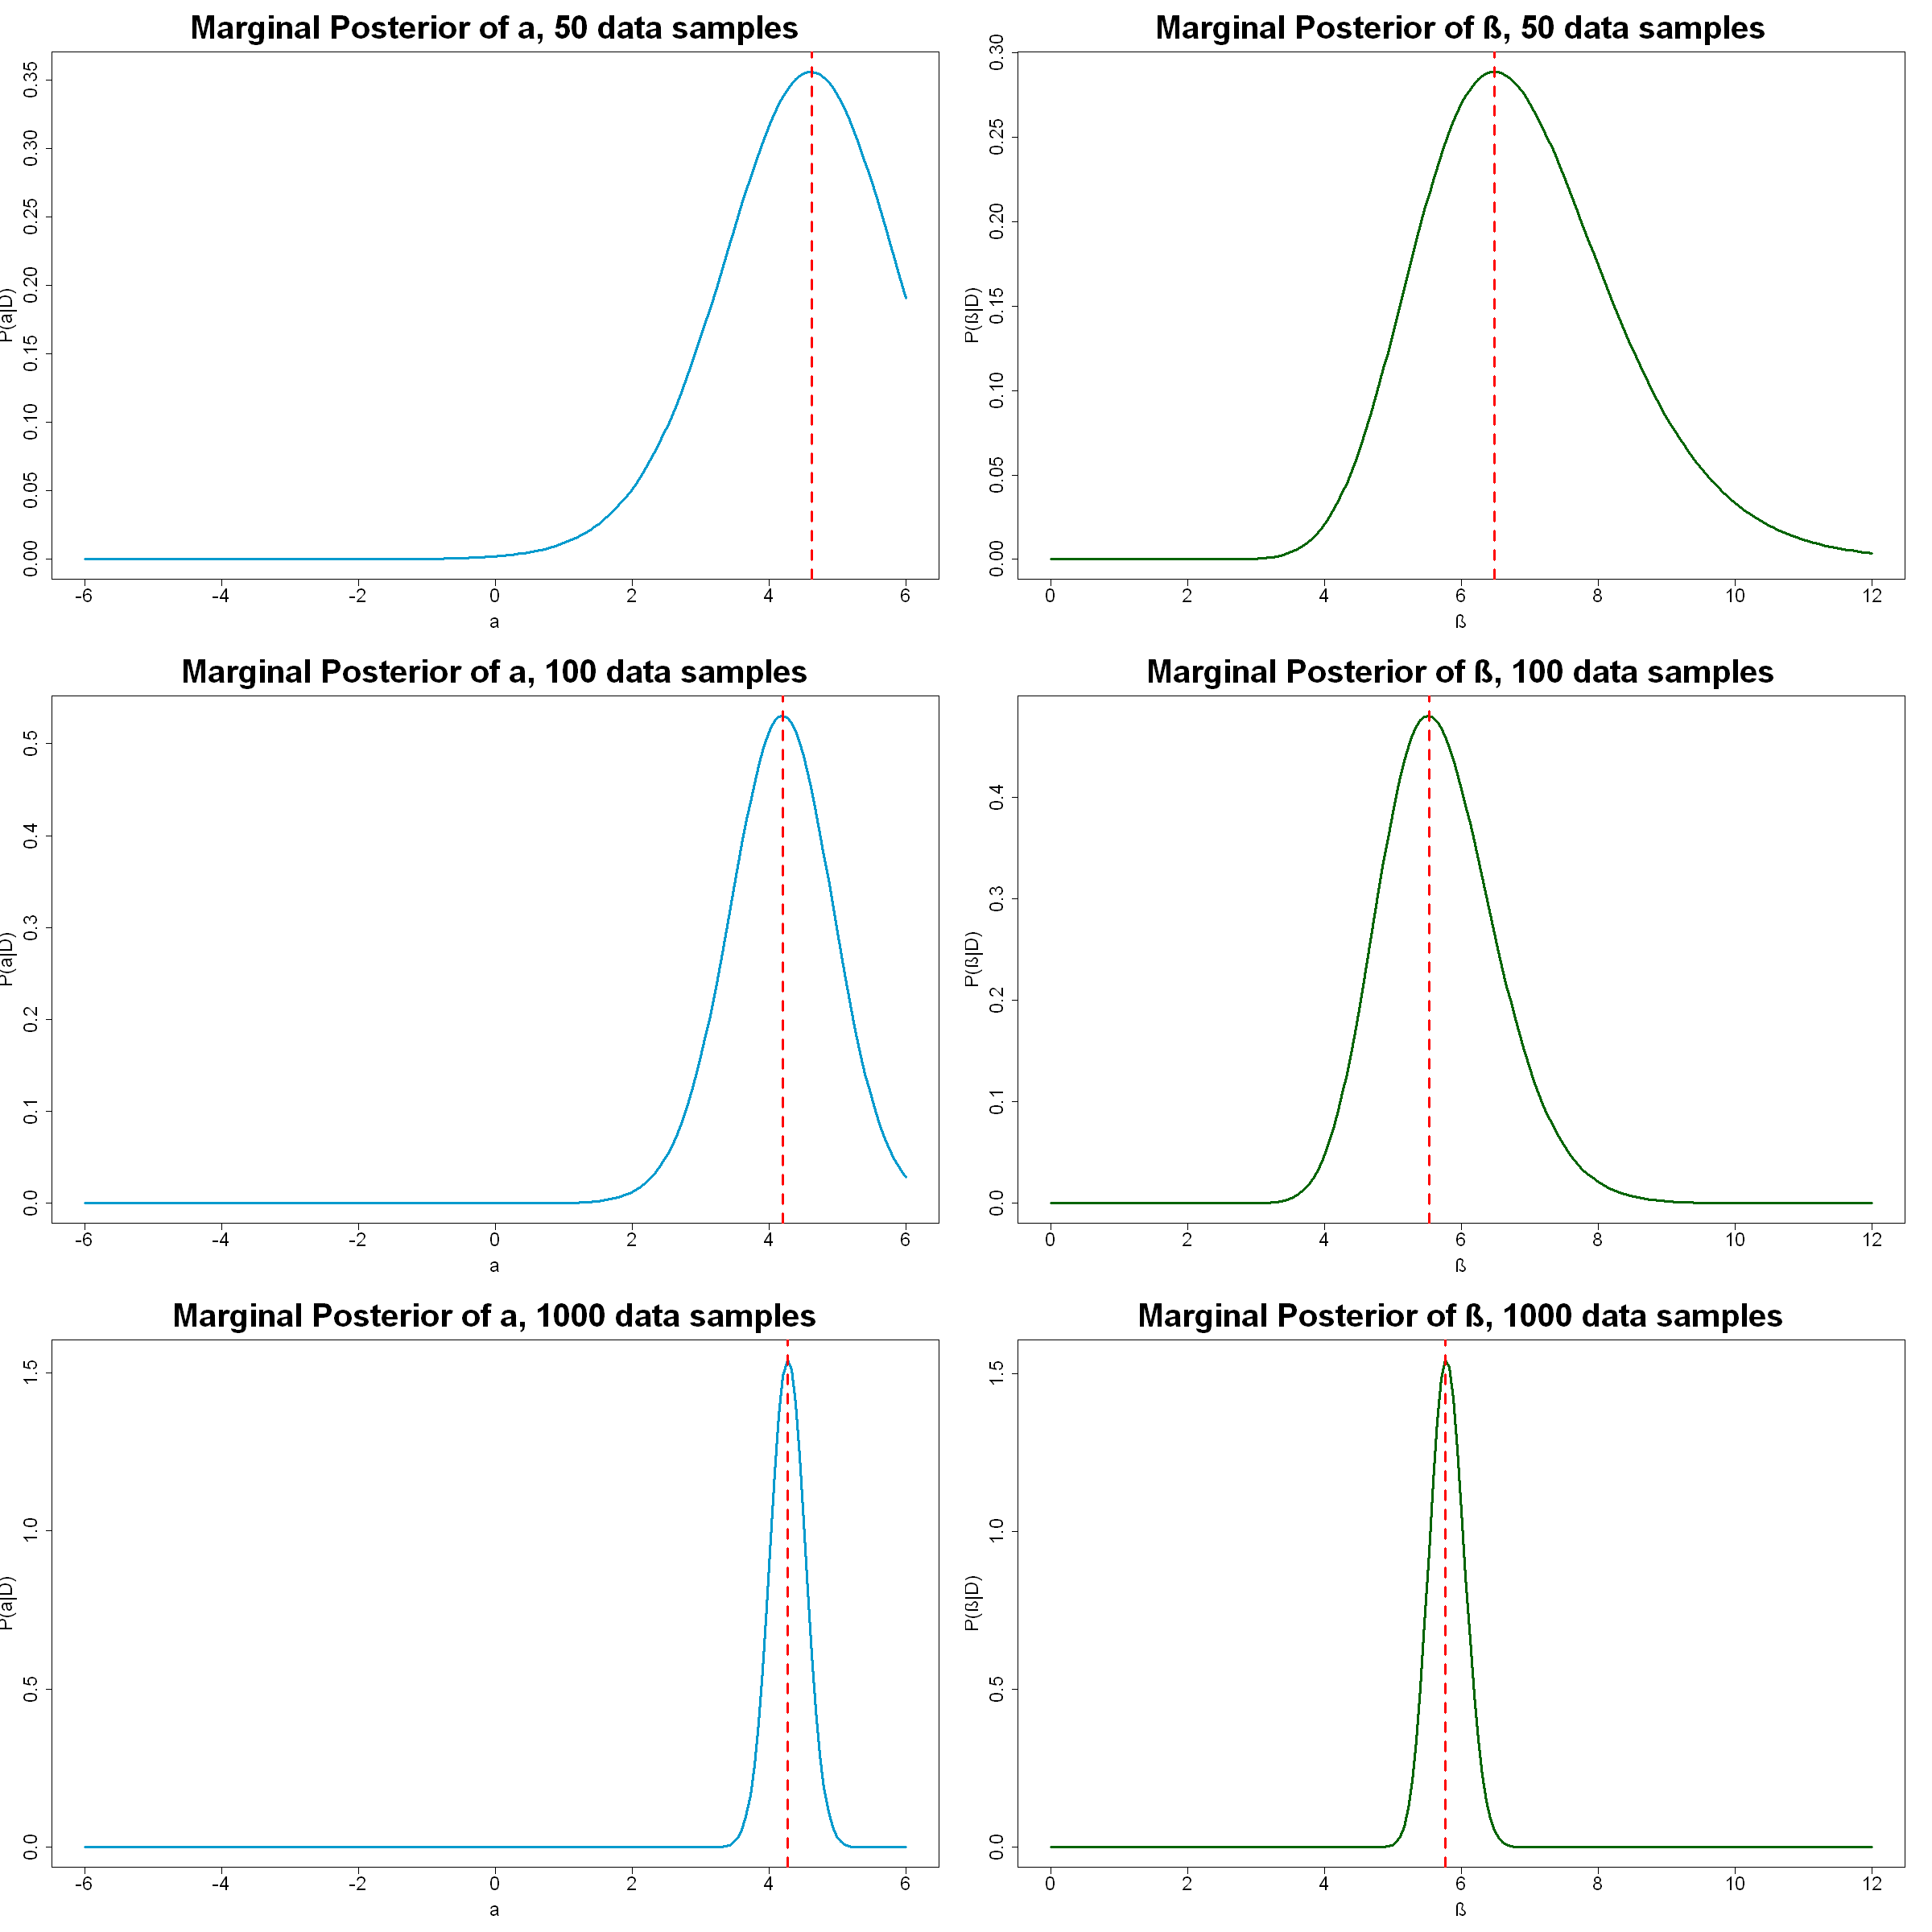

In [20]:
options(repr.plot.width=20, repr.plot.height=20)
par(mfrow=c(3, 2))

for (n in data){
    set.seed(2022461)
    # generate data
    theta_k = runif(n, min = -pi/2, max = +pi/2)
    samples = beta_true*tan(theta_k)+alpha_true
    # calculate marginalized posterior varying alpha and beta 
    post = outer(alpha, beta, purrr::partial(log_post, data=samples))
    post = post - max(post)
    post_norm = exp(post)/(h_a*h_b*sum(exp(post)))
    pna = apply(post_norm, 1, sum)
    pnb = apply(post_norm, 2, sum)
    post_norm_a = pna/(h_a*sum(pna))
    post_norm_b = pnb/(h_b*sum(pnb))
    max_a = find_max(alpha, post_norm_a)
    max_b = find_max(beta, post_norm_b)
    
    # plotting the marginalized posteriors
    
    plot(alpha, post_norm_a, main = sprintf("Marginal Posterior of α, %d data samples", n),
     col="deepskyblue3", xlab = 'α', ylab = 'P(α|D)', cex.lab=1.8, cex.axis=1.8, cex.main=3, type='l', lwd=3)
    abline(v = max_a, col="red", lwd=3, lty=2)
    
    
    plot(beta, post_norm_b, main = sprintf("Marginal Posterior of β, %d data samples", n),
     col="darkgreen", xlab = 'β', ylab = 'P(β|D)', cex.lab=1.8, cex.axis=1.8, cex.main=3, type='l', lwd=3)
    abline(v = max_b, col="red", lwd=3, lty=2)
}

The marginalized posterior curve for $\alpha$ and $\beta$ shows a peak wich becomes more narrow as the data size increases since $FWHM\propto 1/\sqrt{N}$, with $N$ the number of samples.

## Exercise 3

Given the _Signal over Background_ example discussed last week, analyze and discuss the following cases:

### 3.1

Vary the sampling resolution of used to generate the data, keeping the same sampling range `xdat <- seq(from=-7*w, to=7*w, by=0.5*w)`:
- change the resolution $w = \{0.1, 0.25, 1, 2, 3\}$;
- check the effect on the results.

In [21]:
# - Generative model

signal = function(x, a, b, x0, w, t) {
    t * (a*exp(-(x-x0)^2/(2*w^2)) + b)
}

In [22]:
# Define model parameters

x0 = 0 # Signal peak
w = 1 # Signal width
A.true = 2 # Signal amplitude
B.true = 1 # Background amplitude
Delta.t = 5 # Exposure time
r = c(0.1,0.25,1,2,3)

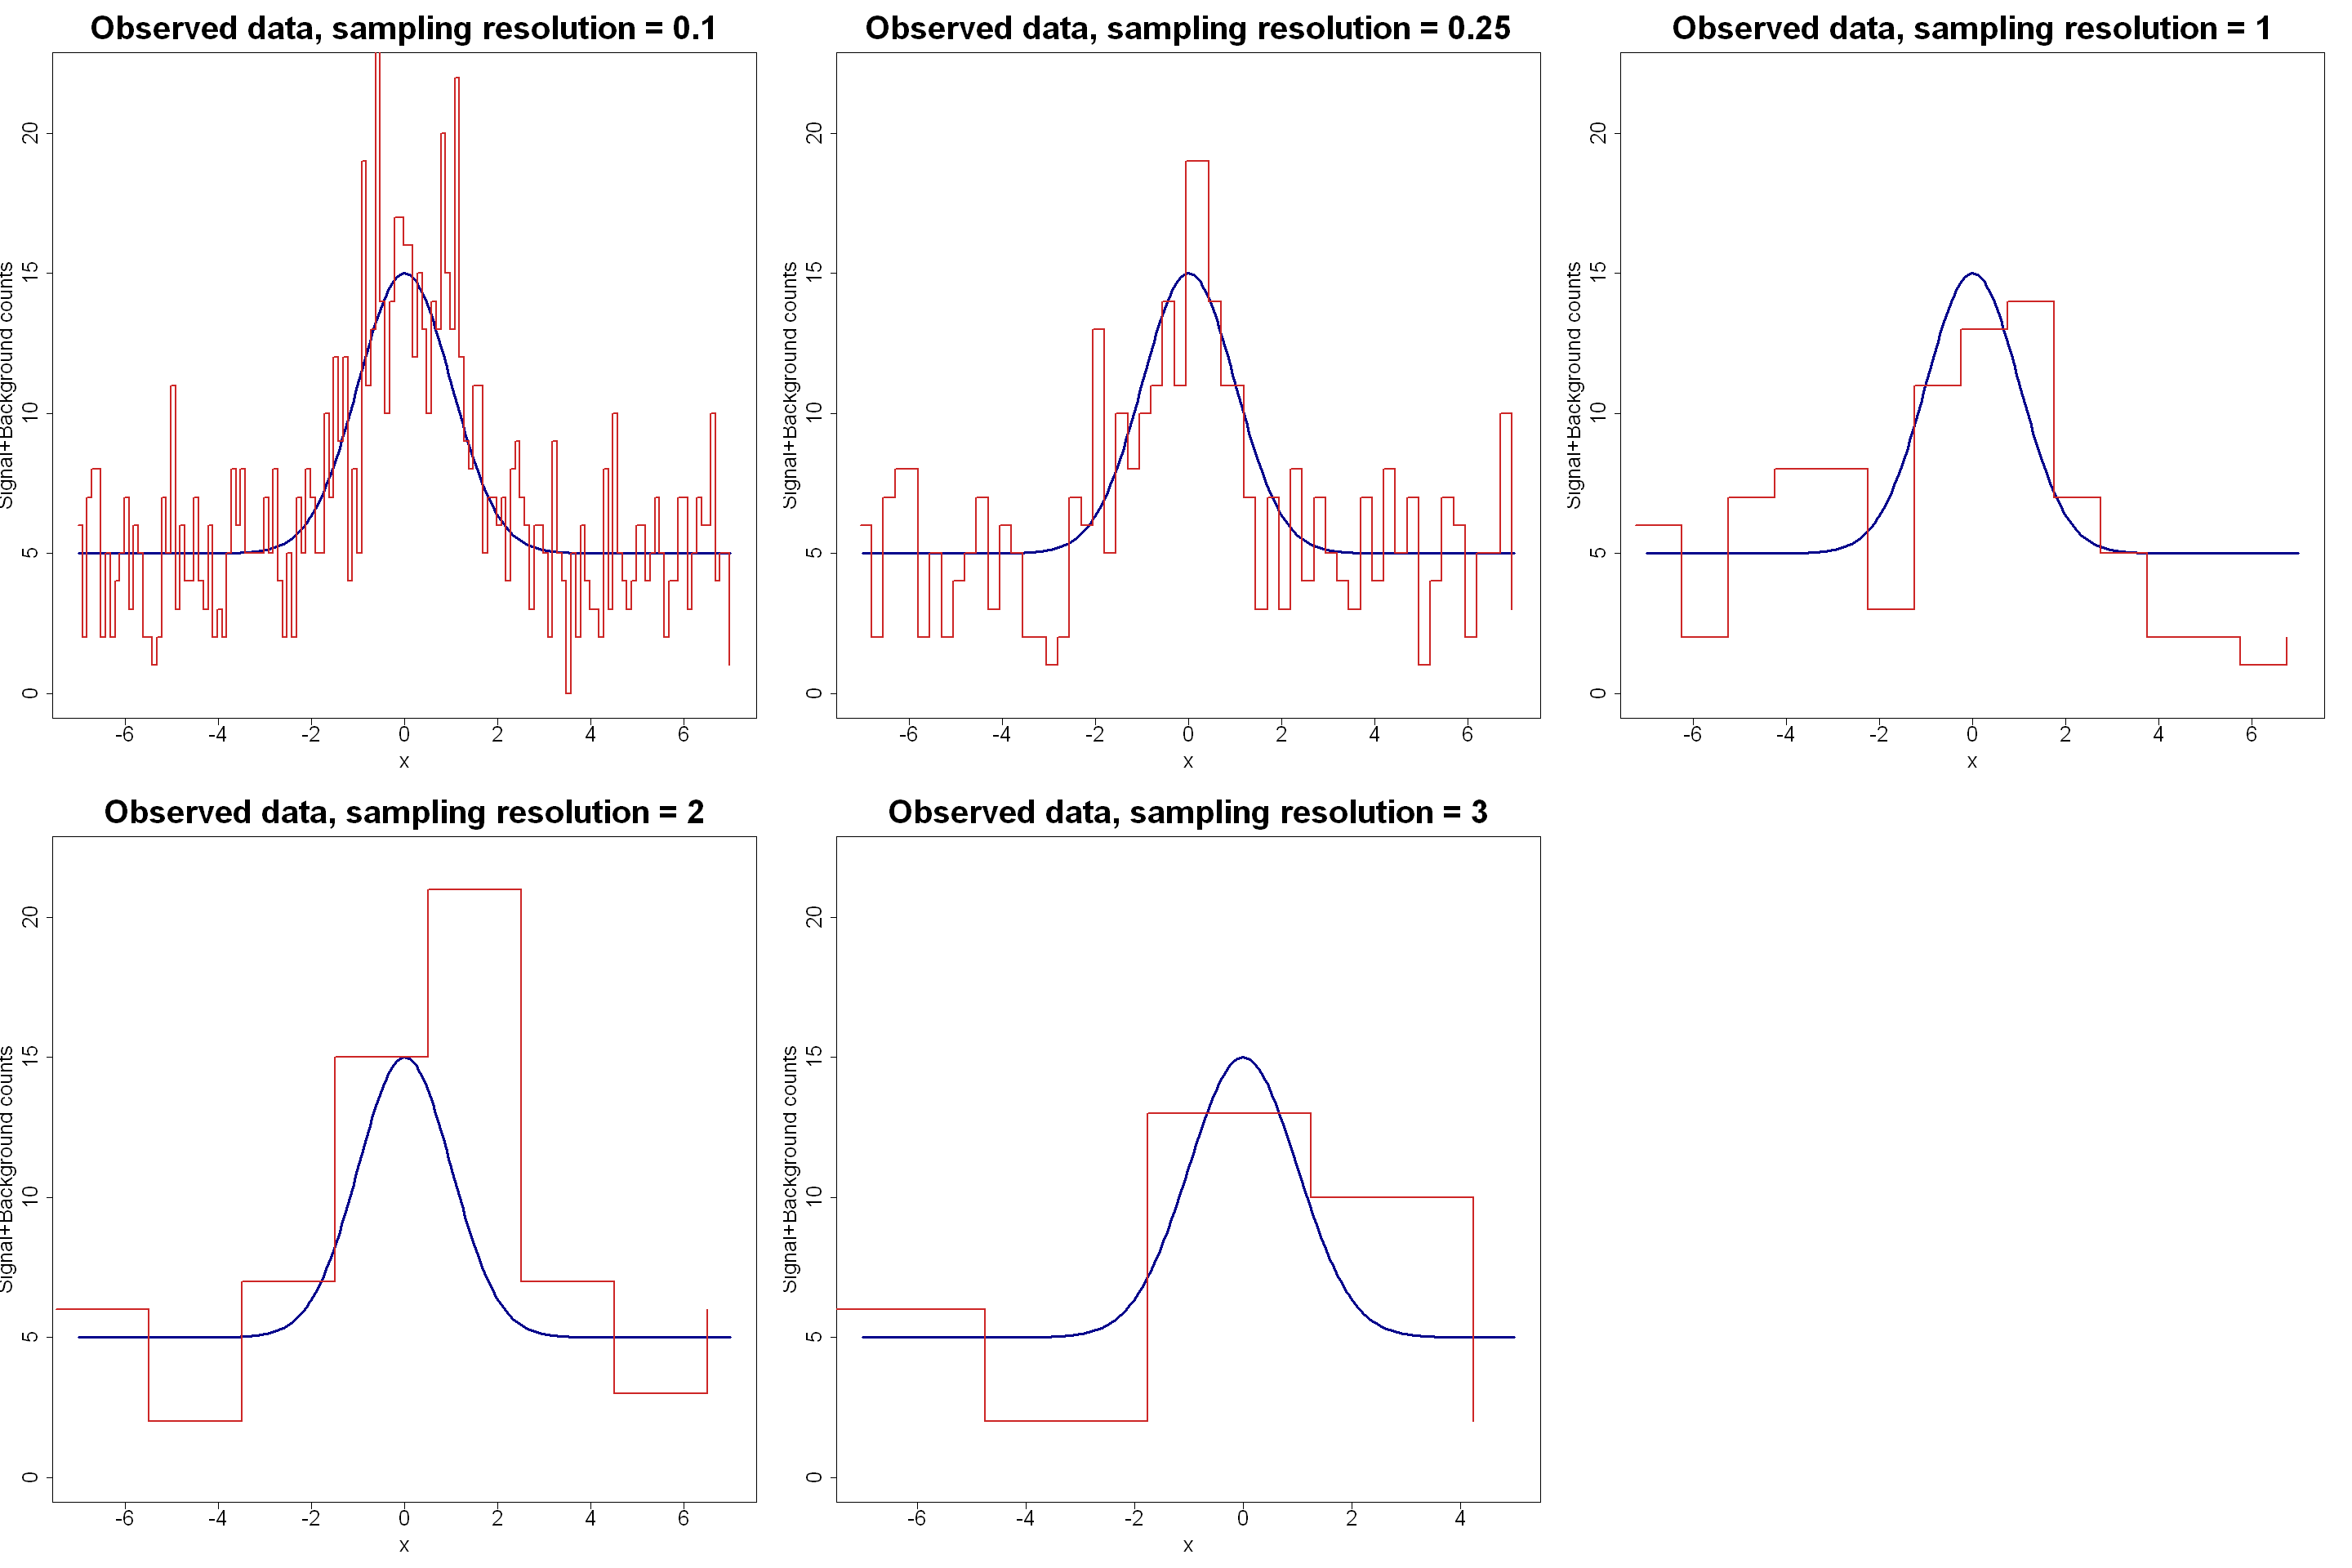

In [23]:
# - Generate the observed data

options(repr.plot.width=24, repr.plot.height=16)
par(mfrow=c(2, 3))
for (ri in r){
    set.seed(2022461)
    xdat = seq(from=-7*w, to=7*w, by=ri*w)
    s.true = signal(xdat, A.true , B.true , x0, w, Delta.t)
    ddat = rpois(length(s.true), s.true)
    xplot = seq(from=min(xdat), to=max(xdat), by=0.05*w)
    splot = signal(xplot, A.true , B.true , x0, w, Delta.t)
    plot(xplot, splot, xlab="x", ylab="Signal+Background counts", type='l', lwd=3, col='darkblue',
         main = sprintf("Observed data, sampling resolution = %g", ri), ylim=c(0,22),
        cex.lab=2, cex.axis=2, cex.main=3)
    xdat.off = xdat - 0.25*ri
    lines(xdat.off, ddat , type='s',col='firebrick3', lwd=2, xlim=range(xplot))
}

In [24]:
# - Sampling grid for computing posterior
alim <- c(0.0, 4.0)
blim <- c(0.5, 1.5)
Nsamp <- 100
uniGrid <- seq(from=1/(2*Nsamp),
to=1-1/(2*Nsamp), by=1/Nsamp)
delta_a <- diff(alim)/Nsamp
delta_b <- diff(blim)/Nsamp
a <- alim[1] + diff(alim)*uniGrid
b <- blim[1] + diff(blim)*uniGrid

In [25]:
# Log posterior
log.post <- function(d, x, a, b, x0, w, t) {
    if(a<0 || b <0) {return(-Inf)} # the effect of the prior
    sum(dpois(d, lambda=signal(x, a, b, x0, w, t), log=TRUE))
}

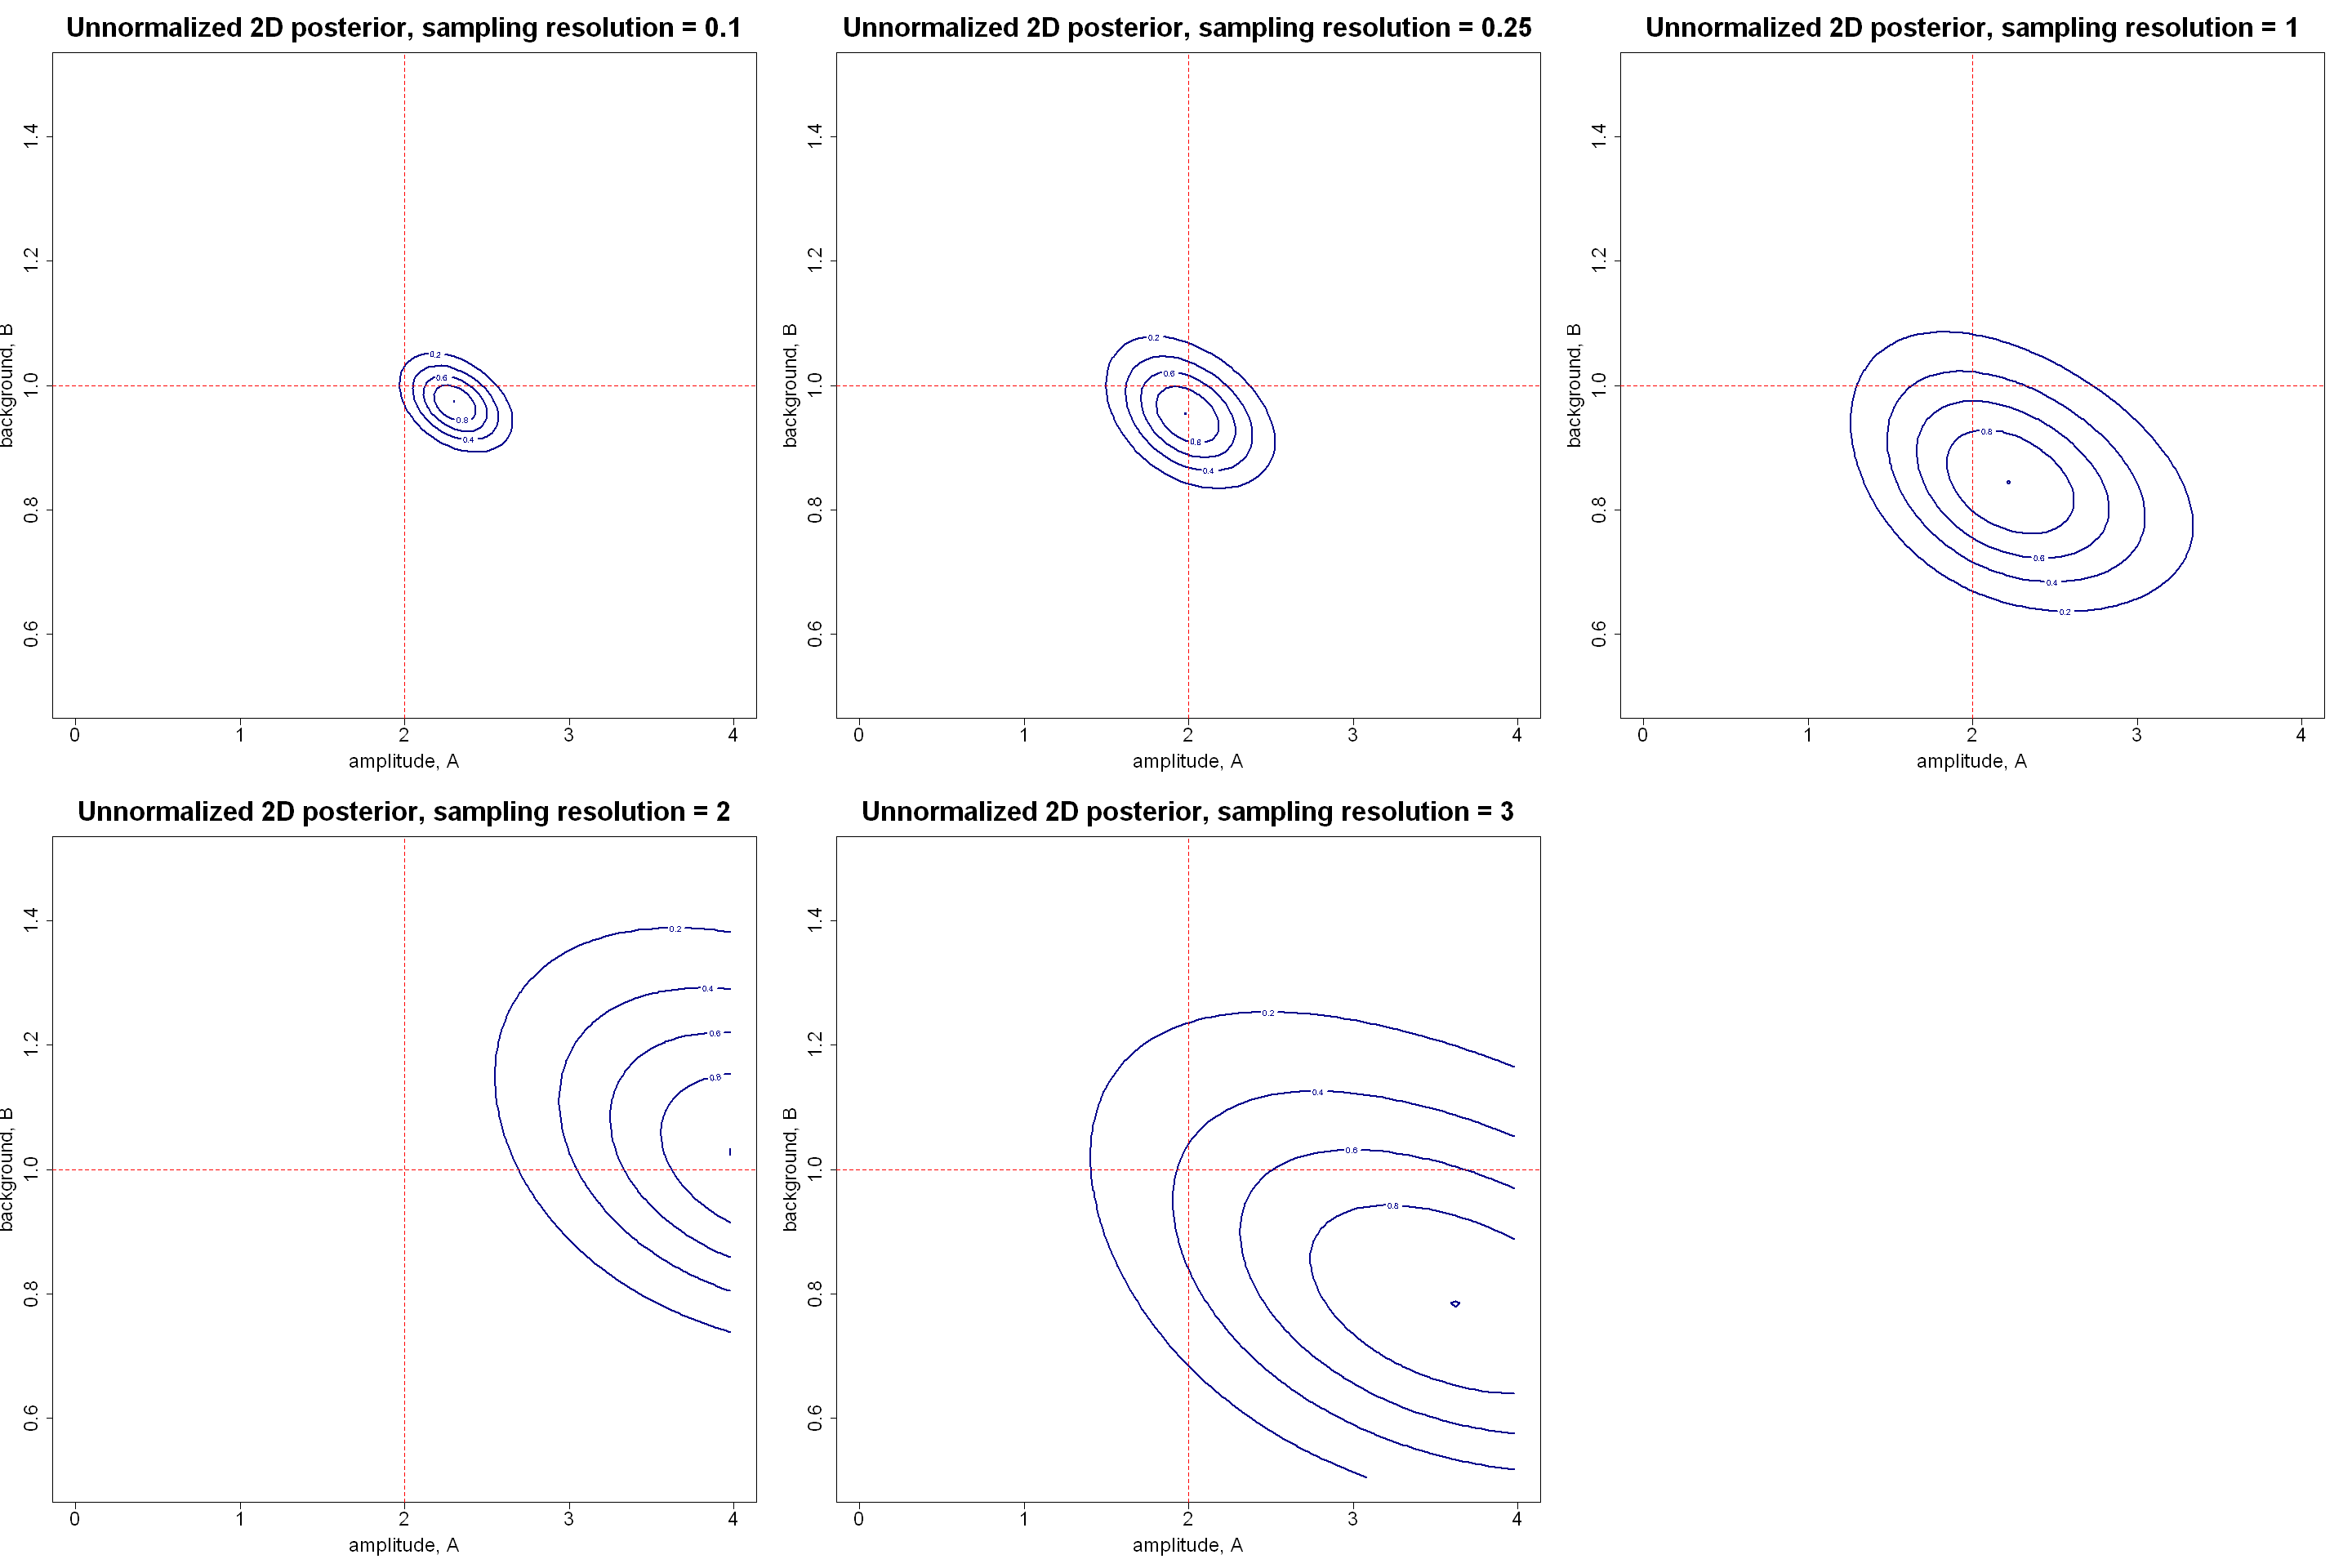

In [26]:
# Compute log unnormalized posterior , z = ln Pˆ*(a,b|D), on a regular grid

options(repr.plot.width=24, repr.plot.height=16)
par(mfrow=c(2, 3))
for (ri in r){
    set.seed(2022461)
    xdat = seq(from=-7*w, to=7*w, by=ri*w)
    s.true = signal(xdat, A.true , B.true , x0, w, Delta.t)
    ddat = rpois(length(s.true), s.true)
    z = matrix(data=NA, nrow=length(a), ncol=length(b))
    for(j in 1:length(a)) {
        for(k in 1:length(b)) {
            z[j,k] = log.post(ddat, xdat, a[j], b[k], x0, w, Delta.t)
        }
    }
    z = z - max(z) # set maximum to zero
    
    # Plot unnormalized 2D posterior as contours.
    
    contour(a, b, exp(z), nlevels = 5, labcex = 0.5, lwd = 2, xlab="amplitude, A", ylab="background, B",
           main = sprintf('Unnormalized 2D posterior, sampling resolution = %g', ri), col = 'darkblue',
           cex.lab=1.8, cex.axis=1.8, cex.main=2.5)
    abline(v=2,h=1,col="red", lty=2)
    }

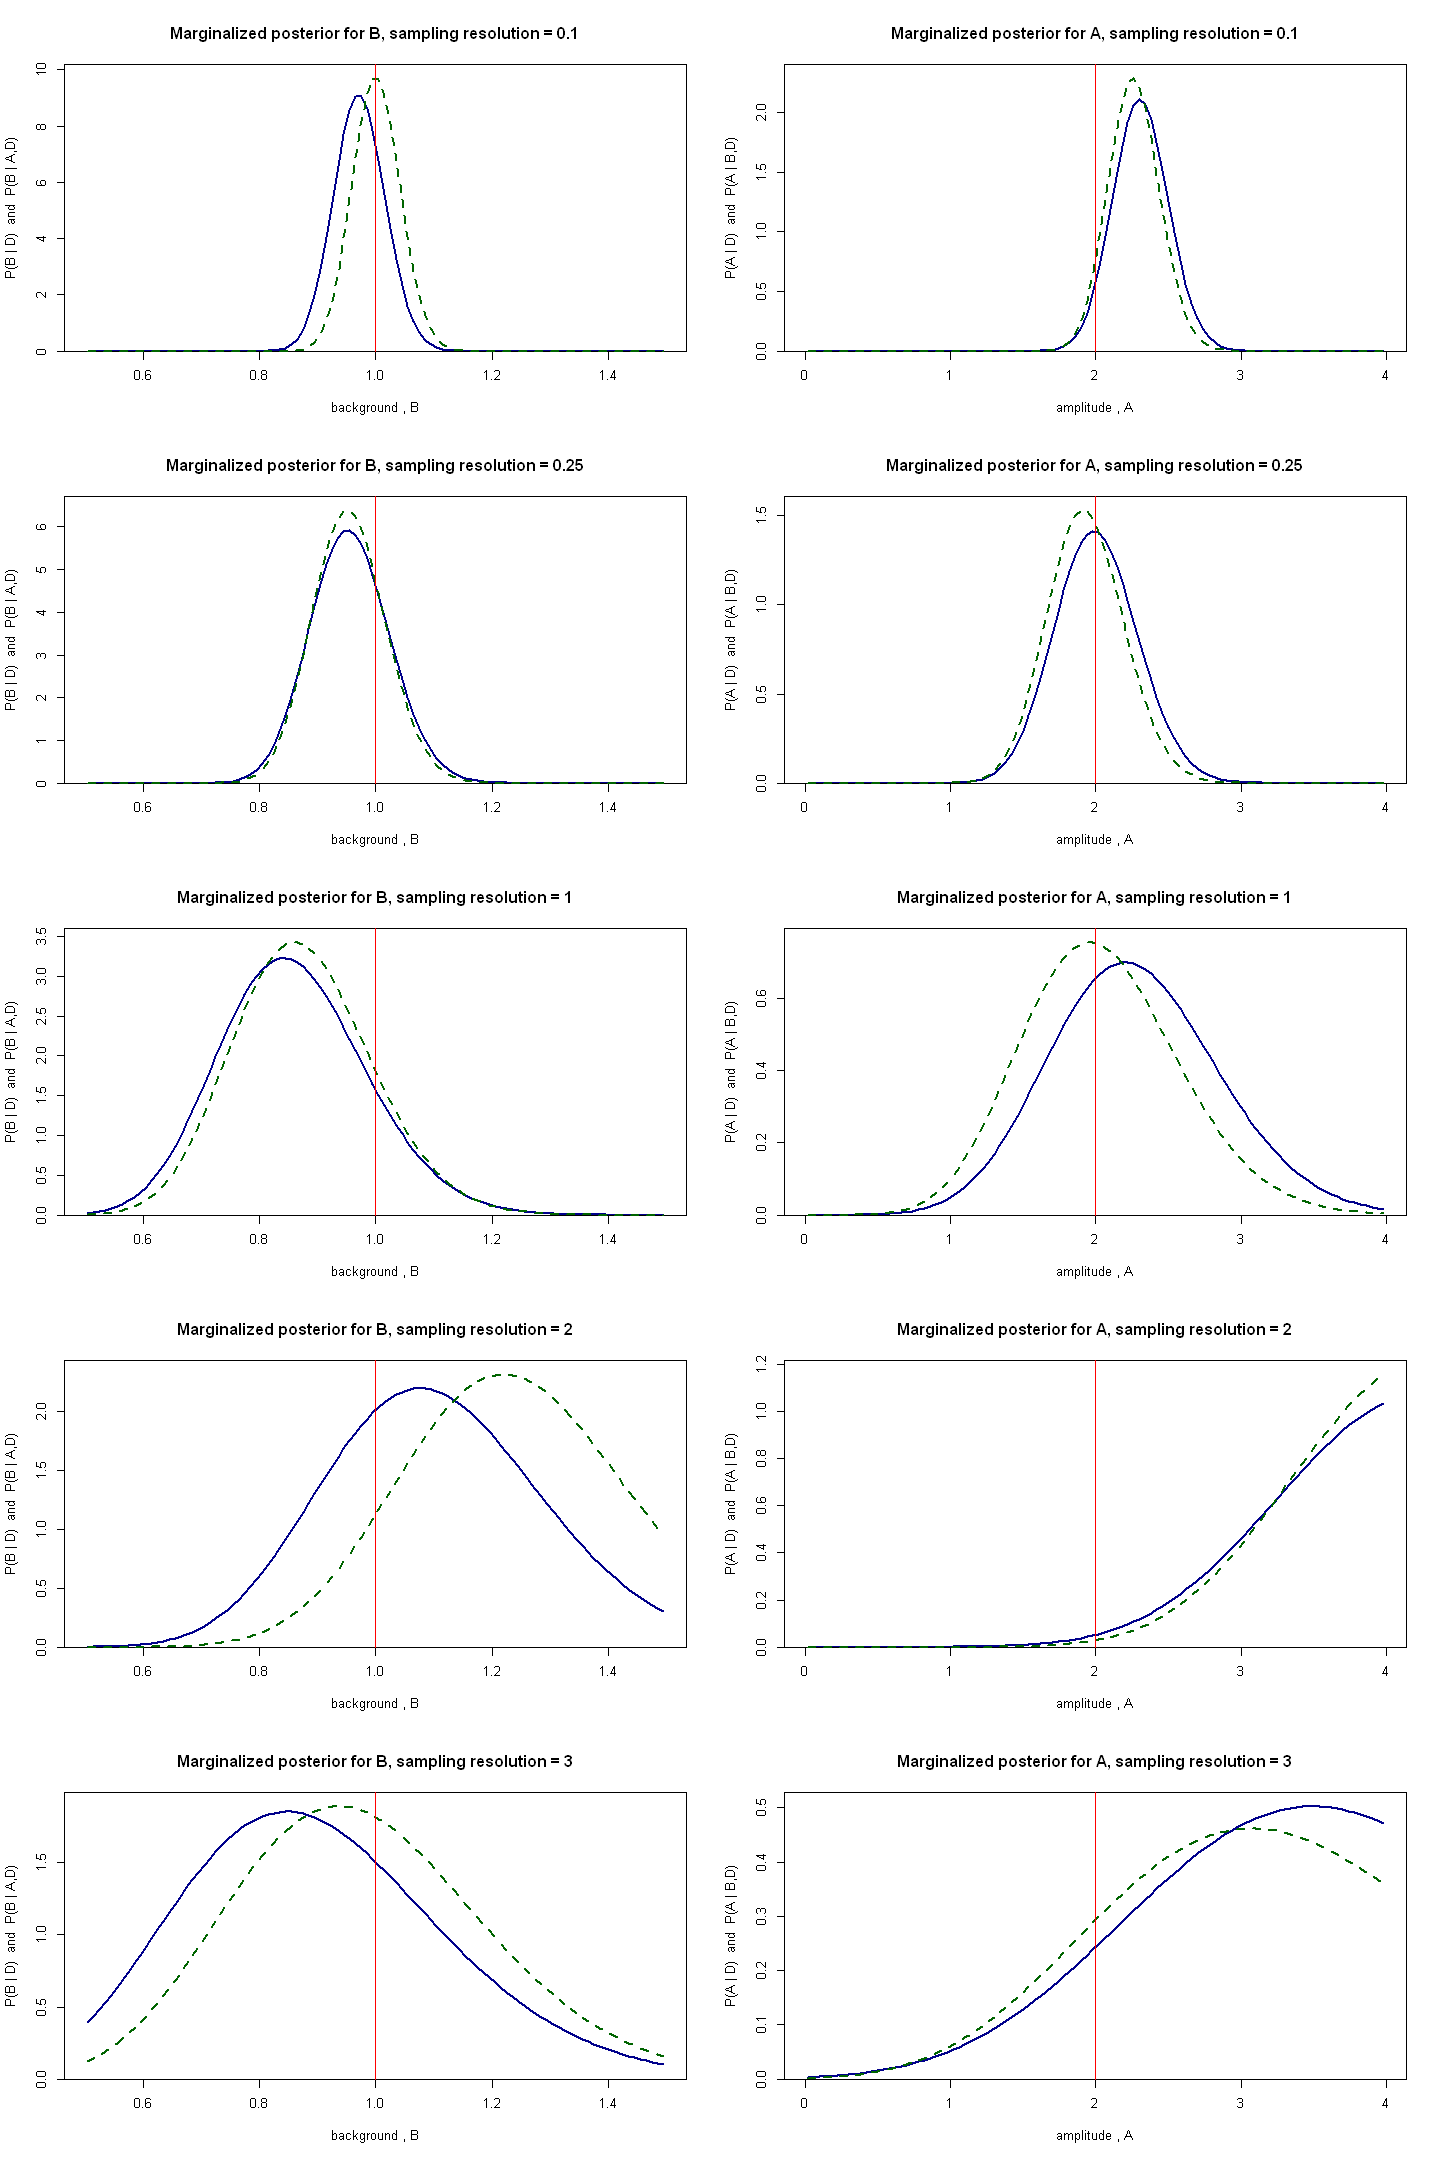

In [27]:
delta_a <- (max(a)-min(a))/Nsamp
delta_b <- (max(b)-min(b))/Nsamp

options(repr.plot.width=12, repr.plot.height=18)
par(mfrow=c(5,2))
for (ri in r){
    set.seed(2022461)
    xdat  = seq(from=-7*w, to=7*w, by=ri*w)
    s.true = signal(xdat, A.true, B.true , x0, w, Delta.t)
    ddat  = rpois(length(s.true), s.true)
    
    # Compute log unnormalized posterior , z = ln P*(a,b|D), on a regular grid
    
    z = matrix(data=NA , nrow=length(a), ncol=length(b))
    for(j in 1:length(a)) {
        for(k in 1:length(b)) {
            z[j,k] = log.post(ddat, xdat, a[j], b[k], x0, w, Delta.t)
        }
    }
    z = z - max(z) # set maximum to zero

    # Compute normalized marginalized posteriors , P(a|D) and P(b|D)
    # by summing over other parameter. Normalize by gridding.
    
    p_a_D = apply(exp(z), 1, sum)
    p_a_D = p_a_D/(delta_a*sum(p_a_D))
    p_b_D <- apply(exp(z), 2, sum)
    p_b_D <- p_b_D/(delta_b*sum(p_b_D))
    
    # Compute normalized conditional posteriors , P(a|b,D) and P(b|a,D)
    # using true values of conditioned parameters. Vectorize(func , par)
    # makes a vectorized function out of func in the parameter par.

    p_a_bD = exp(Vectorize(log.post , "a")(ddat, xdat, a, B.true, x0, w, Delta.t))
    p_a_bD = p_a_bD/(delta_a*sum(p_a_bD))
    p_b_aD = exp(Vectorize(log.post , "b")(ddat, xdat, A.true, b, x0, w, Delta.t))
    p_b_aD = p_b_aD/(delta_b*sum(p_b_aD))
    
    
    # Plot the 1D marginalized posteriors
    plot(b, p_b_D, xlab="background , B", yaxs="i", ylim=1.05*c(0,max(p_b_D, p_b_aD)), ylab="P(B | D)  and  P(B | A,D)",
        type="l", lwd=2, main = sprintf('Marginalized posterior for B, sampling resolution = %g', ri), col = 'darkblue')
    lines(b, p_b_aD, lwd=2, lty=2, col = 'darkgreen')
    abline(v=B.true , col="red")
    
    plot(a, p_a_D, xlab="amplitude , A", yaxs="i", ylim=1.05*c(0,max(p_a_D, p_a_bD)), ylab="P(A | D)  and  P(A | B,D)",
         type="l", lwd=2, main = sprintf('Marginalized posterior for A, sampling resolution = %g', ri), col = 'darkblue')
    lines(a, p_a_bD, lwd=2, lty=2, col = 'darkgreen')
    abline(v=A.true , col="red")
    
}  

By changing the resolution, we obviously "see" worse as we lower it. This means that the lower the resolution, the less peaked is our posterior distribution, including the marginalized posteriors. Since we can see only a rougher grid of samples we can say less confidently where our true value lies. The effect can also be seen on the histograms which have less bin as the resolution decreases. 

### 3.2

Change the ratio $A/B$ used to simulate the data (keeping both positive in accordance with the prior) and check the effect on the results.

The amplitude of the background is kept constant while the amplitude of the signal has different values.

In [28]:
# Define model parameters

x0 = 0 # Signal peak
w = 1 # Signal width
A.true = c(2, 3, 5, 7, 10, 15, 20, 30) # Signal amplitude
B.true = 1
Delta.t = 5 # Exposure time

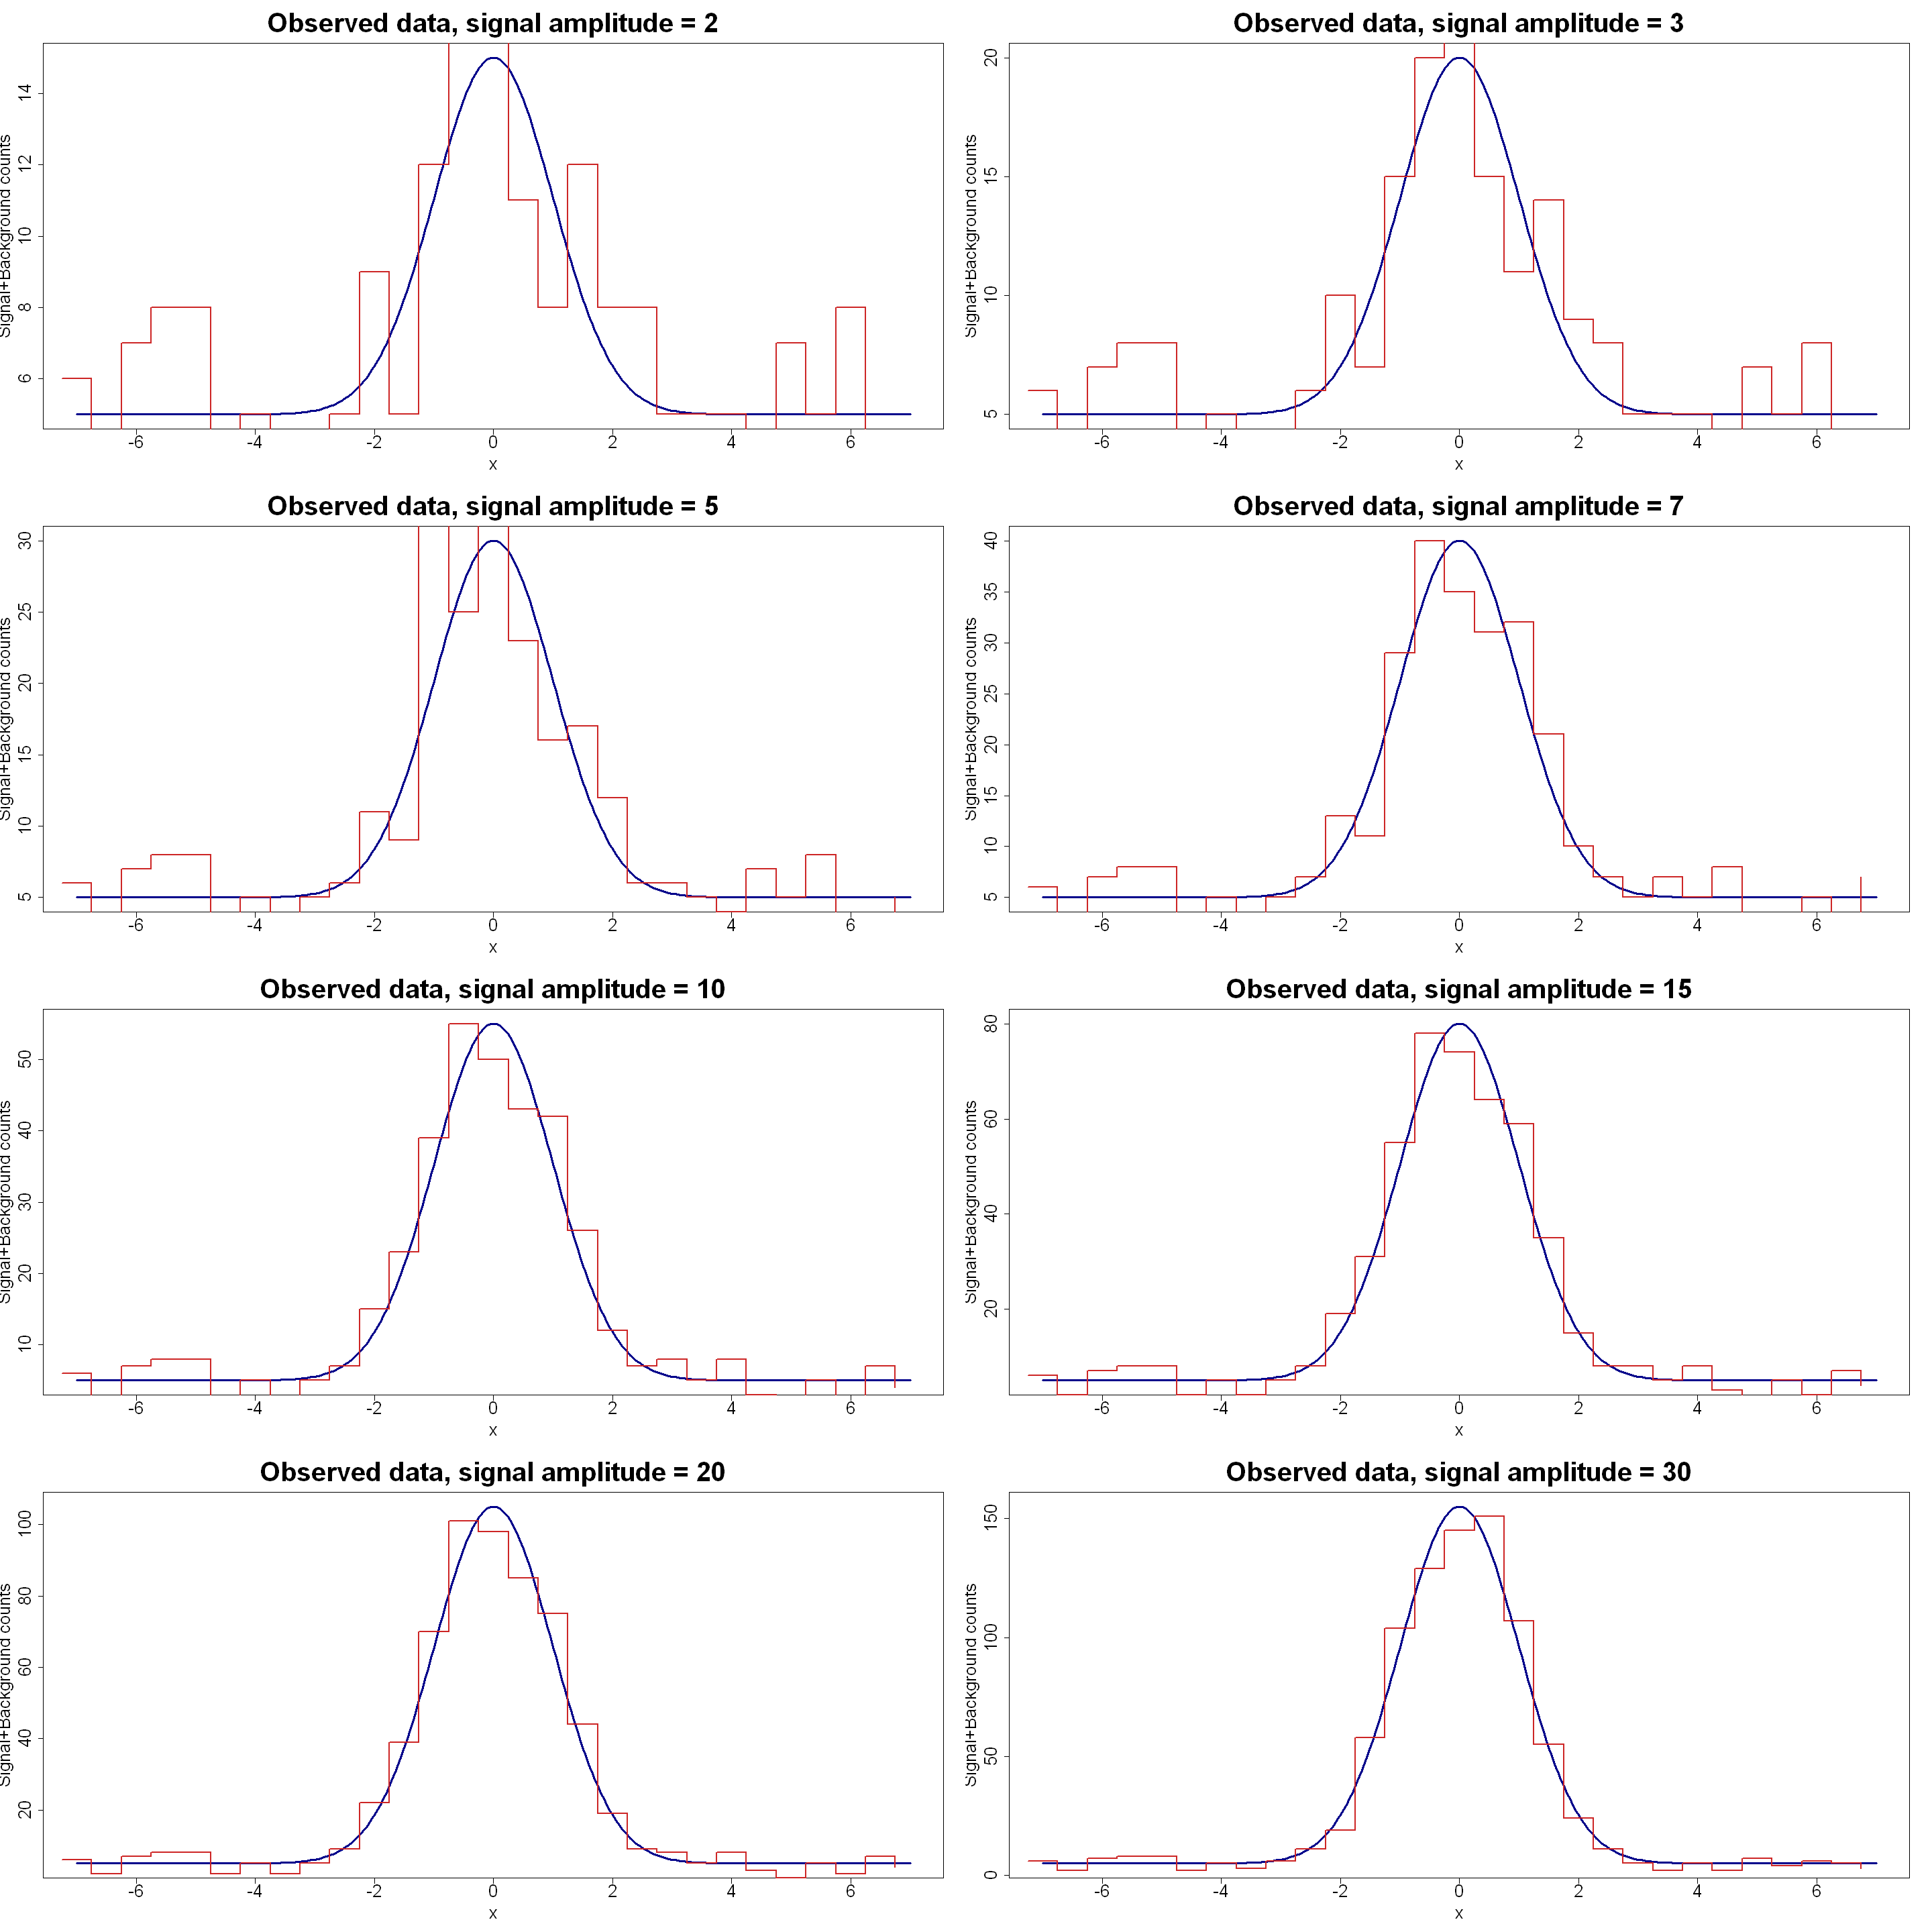

In [29]:
# - Generate the observed data

options(repr.plot.width=24, repr.plot.height=24)
par(mfrow=c(4, 2))
for (atr in A.true){
    set.seed(2022461)
    xdat = seq(from=-7*w, to=7*w, by=0.5*w)
    s.true = signal(xdat, atr, B.true , x0, w, Delta.t)
    ddat = rpois(length(s.true), s.true)
    xplot = seq(from=min(xdat), to=max(xdat), by=0.05*w)
    splot = signal(xplot, atr, B.true , x0, w, Delta.t)
    plot(xplot, splot, xlab="x", ylab="Signal+Background counts", type='l', lwd=3, col='darkblue',
         main = sprintf("Observed data, signal amplitude = %g", atr),
        cex.lab=2, cex.axis=2, cex.main=3)
    xdat.off = xdat - 0.25
    lines(xdat.off, ddat , type='s',col='firebrick3', lwd=2, xlim=range(xplot))
}

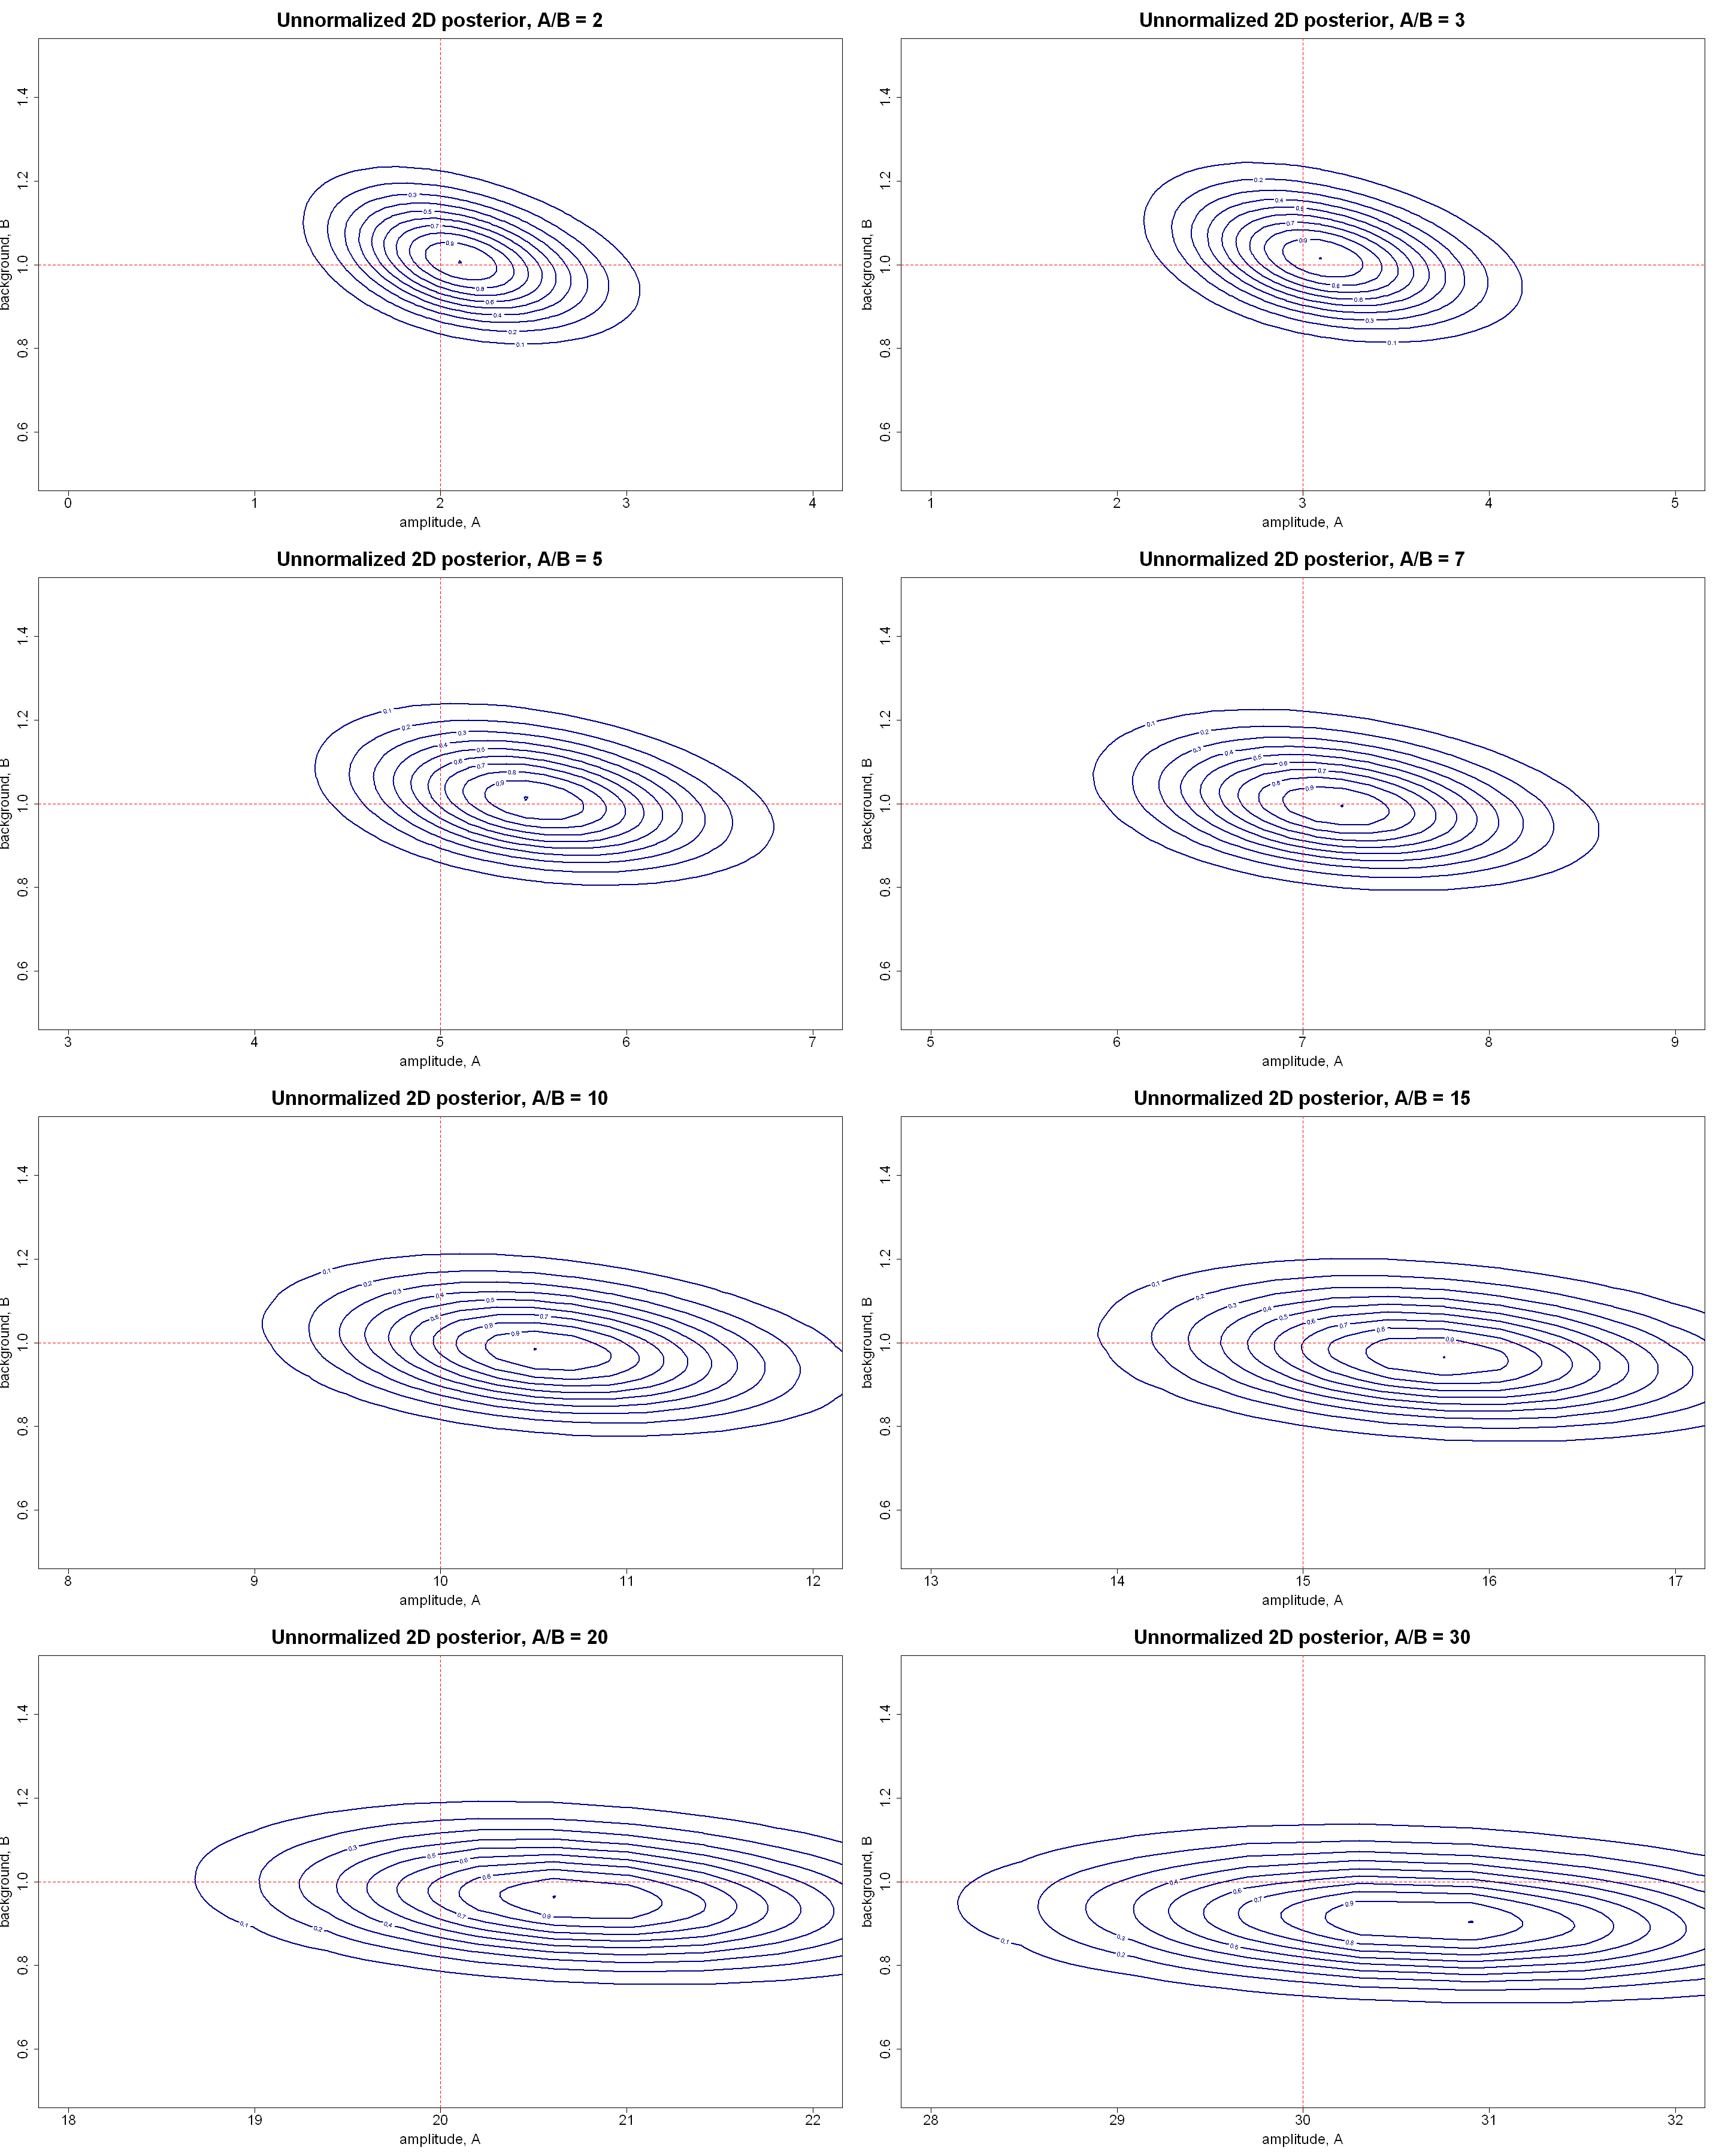

In [30]:
# Compute log unnormalized posterior , z = ln Pˆ*(a,b|D), on a regular grid

options(repr.plot.width=24, repr.plot.height=30)
par(mfrow=c(4, 2))
for (atr in A.true){
    
    a   = seq(0.0, 2*atr, length.out=Nsamp)
    b   = seq(0.5, 1.5, length.out=Nsamp)
    SNR = atr / B.true

    set.seed(2022461)
    xdat = seq(from=-7*w, to=7*w, by=0.5*w)
    s.true = signal(xdat, atr, B.true , x0, w, Delta.t)
    ddat = rpois(length(s.true), s.true)
    z = matrix(data=NA, nrow=length(a), ncol=length(b))
    for(j in 1:length(a)) {
        for(k in 1:length(b)) {
            z[j,k] = log.post(ddat, xdat, a[j], b[k], x0, w, Delta.t)
        }
    }
    z = z - max(z) # set maximum to zero
    
    # Plot unnormalized 2D posterior as contours.
    
    contour(a, b, exp(z), nlevels = 10, labcex = 0.5, lwd = 2, xlab="amplitude, A", ylab="background, B",
            xlim=c(atr-2,atr+2),
           main = sprintf('Unnormalized 2D posterior, A/B = %g', SNR), col = 'darkblue',
           cex.lab=1.8, cex.axis=1.8, cex.main=2.5)
    abline(v=atr,h=1,col="red", lty=2)
    }

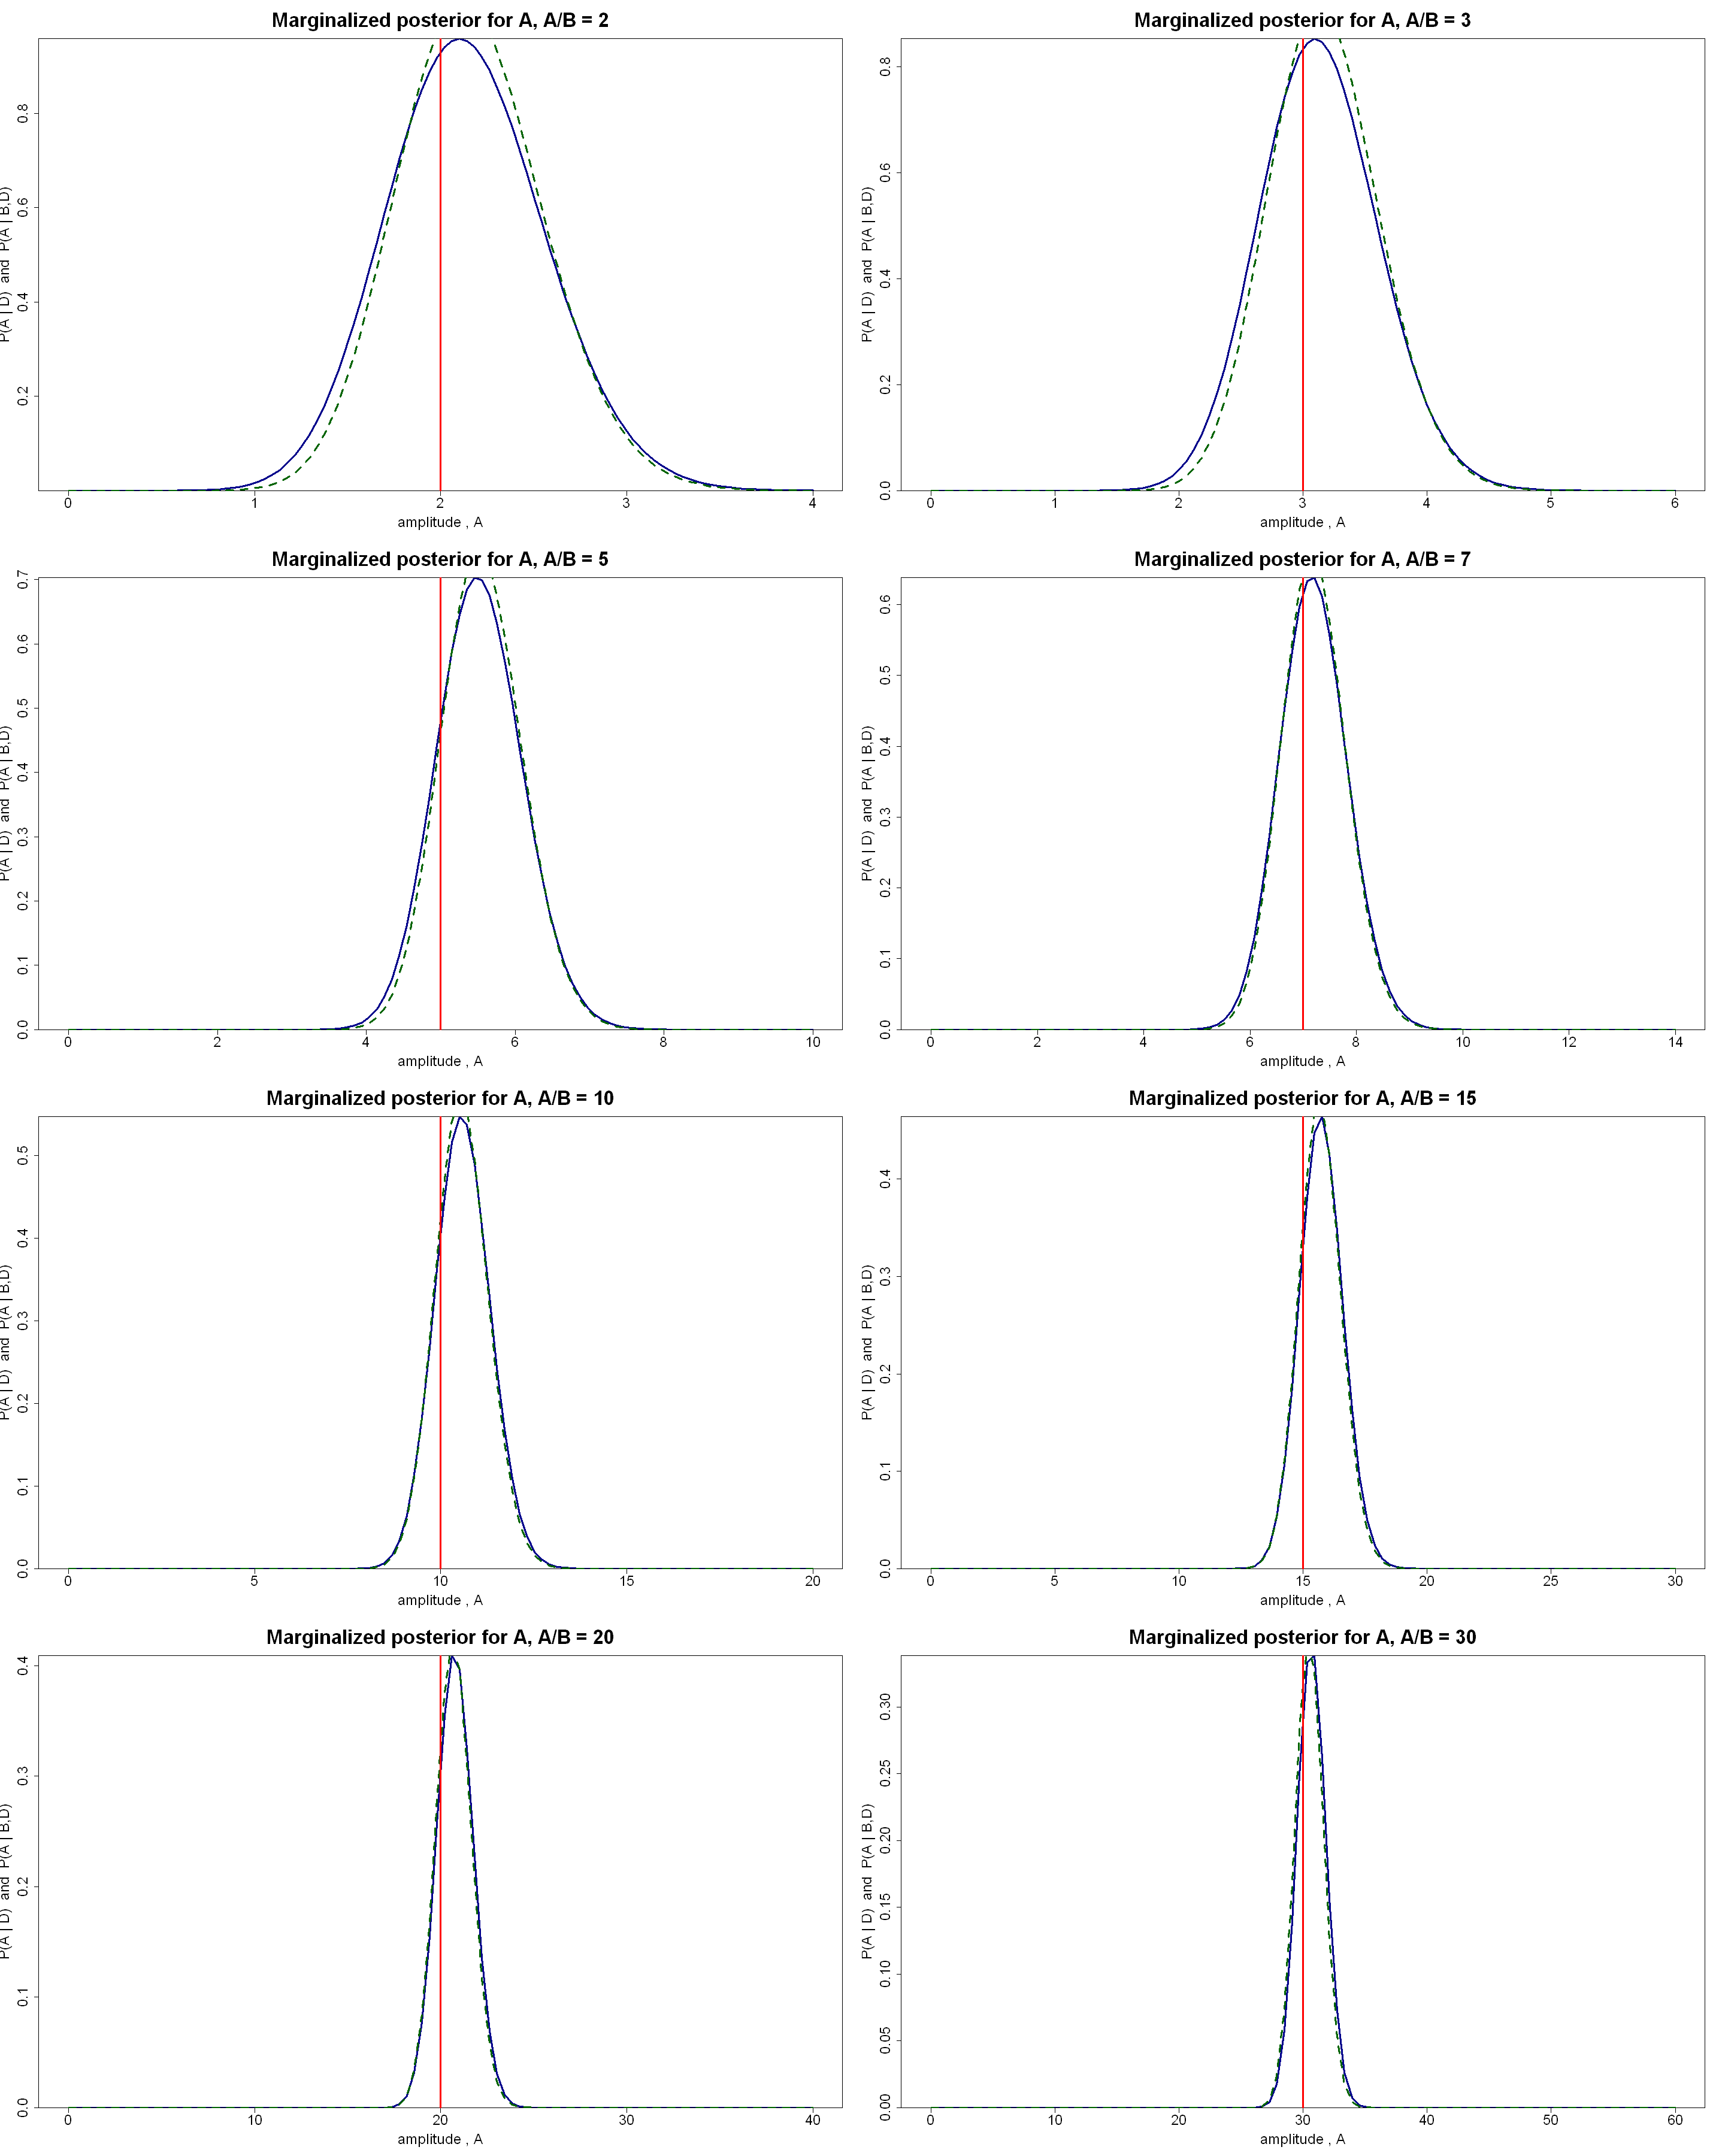

In [31]:
b   = seq(0.5, 1.5, length.out=Nsamp)
delta_b <- (max(b)-min(b))/Nsamp

options(repr.plot.width=24, repr.plot.height=30)
par(mfrow=c(4, 2))
for (atr in A.true){
    
    a   = seq(0.0, 2*atr, length.out=Nsamp)
    SNR = atr / B.true
    delta_a = (max(a)-min(a))/Nsamp
    
    set.seed(2022461)
    xdat  = seq(from=-7*w, to=7*w, by=0.5*w)
    s.true = signal(xdat, atr, B.true , x0, w, Delta.t)
    ddat  = rpois(length(s.true), s.true)
    
    # Compute log unnormalized posterior , z = ln P*(a,b|D), on a regular grid
    
    z = matrix(data=NA , nrow=length(a), ncol=length(b))
    for(j in 1:length(a)) {
        for(k in 1:length(b)) {
            z[j,k] = log.post(ddat, xdat, a[j], b[k], x0, w, Delta.t)
        }
    }
    z = z - max(z) # set maximum to zero

    # Compute normalized marginalized posteriors , P(a|D) and P(b|D)
    # by summing over other parameter. Normalize by gridding.
    
    p_a_D = apply(exp(z), 1, sum)
    p_a_D = p_a_D/(delta_a*sum(p_a_D))
    
    # Compute normalized conditional posteriors , P(a|b,D) and P(b|a,D)
    # using true values of conditioned parameters. Vectorize(func , par)
    # makes a vectorized function out of func in the parameter par.

    p_a_bD = exp(Vectorize(log.post, "a")(ddat, xdat, a, B.true, x0, w, Delta.t))
    p_a_bD = p_a_bD/(delta_a*sum(p_a_bD))
    
    
    # Plot the 1D marginalized posteriors
    
    plot(a, p_a_D, xlab="amplitude , A", yaxs="i", ylab="P(A | D)  and  P(A | B,D)",
         type="l", lwd=3, main = sprintf('Marginalized posterior for A, A/B = %g', SNR), col = 'darkblue',
         cex.lab=1.8, cex.axis=1.8, cex.main=2.5)
    lines(a, p_a_bD, lwd=3, lty=2, col = 'darkgreen')
    abline(v=atr , col="red", lwd=3)
    
}  

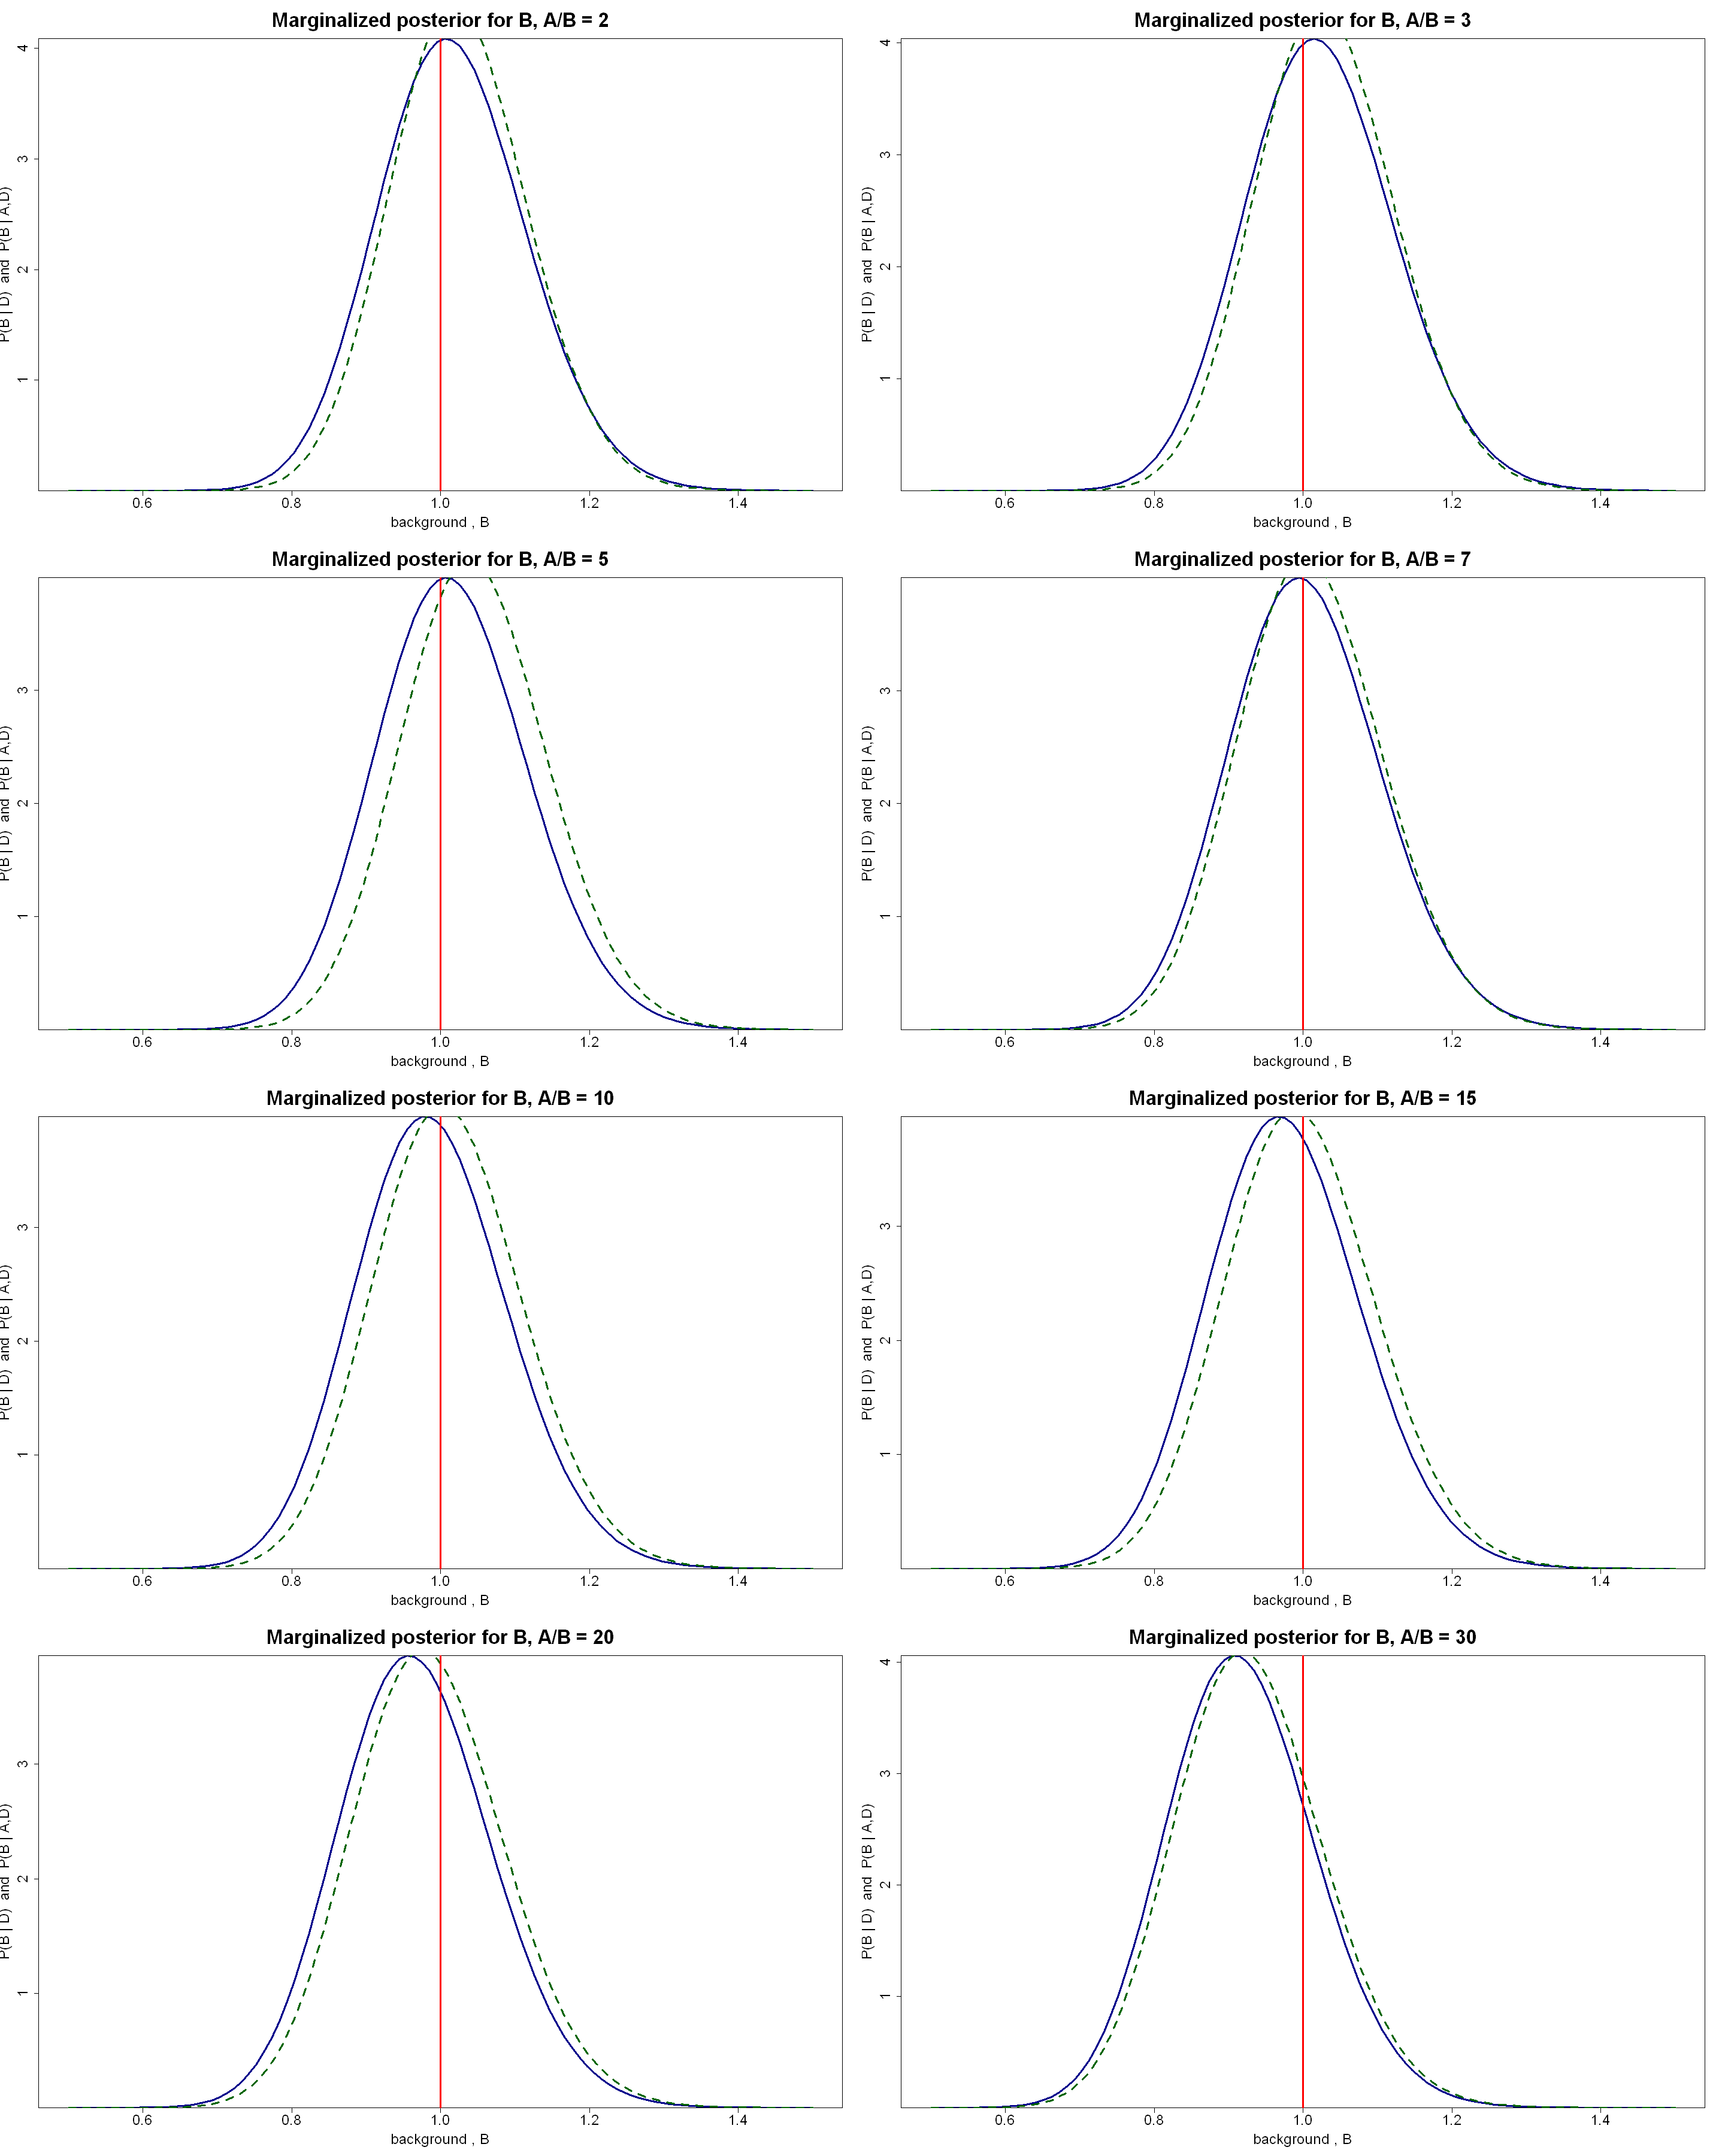

In [32]:
b   = seq(0.5, 1.5, length.out=Nsamp)
delta_b <- (max(b)-min(b))/Nsamp

options(repr.plot.width=24, repr.plot.height=30)
par(mfrow=c(4, 2))
for (atr in A.true){
    
    a   = seq(0.0, 2*atr, length.out=Nsamp)
    SNR = atr / B.true
    delta_a = (max(a)-min(a))/Nsamp
    
    set.seed(2022461)
    xdat  = seq(from=-7*w, to=7*w, by=0.5*w)
    s.true = signal(xdat, atr, B.true , x0, w, Delta.t)
    ddat  = rpois(length(s.true), s.true)
    
    # Compute log unnormalized posterior , z = ln P*(a,b|D), on a regular grid
    
    z = matrix(data=NA , nrow=length(a), ncol=length(b))
    for(j in 1:length(a)) {
        for(k in 1:length(b)) {
            z[j,k] = log.post(ddat, xdat, a[j], b[k], x0, w, Delta.t)
        }
    }
    z = z - max(z) # set maximum to zero

    # Compute normalized marginalized posteriors , P(a|D) and P(b|D)
    # by summing over other parameter. Normalize by gridding.
    
    p_b_D <- apply(exp(z), 2, sum)
    p_b_D <- p_b_D/(delta_b*sum(p_b_D))
    
    # Compute normalized conditional posteriors , P(a|b,D) and P(b|a,D)
    # using true values of conditioned parameters. Vectorize(func , par)
    # makes a vectorized function out of func in the parameter par.

    p_b_aD = exp(Vectorize(log.post , "b")(ddat, xdat, atr, b, x0, w, Delta.t))
    p_b_aD = p_b_aD/(delta_b*sum(p_b_aD))
    
    
    # Plot the 1D marginalized posteriors
    plot(b, p_b_D, xlab="background , B", yaxs="i", ylab="P(B | D)  and  P(B | A,D)",
        type="l", lwd=3, main = sprintf('Marginalized posterior for B, A/B = %g', SNR), col = 'darkblue',
        cex.lab=1.8, cex.axis=1.8, cex.main=2.5)
    lines(b, p_b_aD, lwd=3, lty=2, col = 'darkgreen')
    abline(v=B.true , col="red", lwd=3)
    
}  

Depending on the $SNR$ ratio $A/B$ the posterior for the marginalization of $A$ and $B$ changes: for high values of $SNR$ the curve for $A$ becomes narrower and more peaked on the true value while for $B$ there's no significant change. This is easy to understand since a higher $SNR$ ratio means that the signal is more definite while the background is the same (or that there is less background and the signal is the same).